# StartUp Funding

###### A startup with a brilliant business idea is aiming to get its operations up and running. From humble beginnings, the company proves the worthiness of its model and products, steadily growing thanks to the generosity of friends, family, and the founders' own financial resources. Over time, its customer base begins to grow, and the business begins to expand its operations and its aims. Before long, the company has risen through the ranks of its competitors to become highly valued, opening the possibilities for future expansion to include new offices, employees, and even an initial public offering (IPO)

This project shows the insights of funding done by startups and how growth changed with several factors. The aim of paper is to get a descriptive overview and a relationship pattern of funding and growth of newly launched startups. Another important point to understand how funding changes with time is an important aspect. Possible area of interests would be – (Funding ecosystem and time relation, cities as a important factor, which industries, important investors). Dataset we are using contains information of funding of startups from January 2015 to August 2017.The amount invested is in USD. Aggregation of data w.r.t cities, investors, funding type etc. is required to get an optimized result. Here we done major preprocessing of data and overcome problem of missing data and uncertain distributions. Also, Visualizations are done to find the anomalies and mining patterns from data. It seems to be some cities showing some abnormal behavior when it comes to funding.

In [1]:
#Import some useful libraries

import pandas as pd
import seaborn as sns
import squarify
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import preprocessing

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
## Function for providing summary in dataframe
%matplotlib inline

def funding_information(data,name):
    company = data[data['name'] == name]
    print ("Company : ", name)
    print ("Total Funding : ", company.funding_total_usd.values[0] , " $")
    print ("Seed Funding : ", company.seed.values[0] , " $")
    print ("Angle Funding :", company.angel.values[0] , " $")
    print ("Grant Funding : ",company.grant.values[0] , " $")
    print ("Product Crowd Funding : ",company.product_crowdfunding.values[0] , " $")
    print ("Equity Crowd Funding : ",company.equity_crowdfunding.values[0] , " $")
    print ("Undisclode Funding : ", company.undisclosed.values[0] , " $")
    print ("Convertible Note : ", company.convertible_note.values[0] , " $")
    print ("Debt Financing : ", company.debt_financing.values[0] , " $")
    print ("Private Equity : ",company.private_equity.values[0] , " $")
    print ("PostIPO Equity : ",company.post_ipo_equity.values[0] , " $")
    print ("PostIPO Debt : ",company.post_ipo_debt.values[0] , " $")
    print ("Secondary Market : ",company.secondary_market.values[0] , " $")
    print ("Venture Funding : ",company.venture.values[0] , " $")
    print ("Round A funding : ",company.round_A.values[0] , " $")
    print ("Round B funding : ",company.round_B.values[0] , " $")
    print ("Round C funding : ",company.round_C.values[0] , " $")
    print ("Round D funding : ",company.round_D.values[0] , " $")
    print ("Round E funding : ",company.round_E.values[0] , " $")
    print ("Round F funding : ",company.round_F.values[0] , " $")
    print ("Round G funding : ",company.round_G.values[0] , " $")
    print ("Round H funding : ",company.round_H.values[0] , " $")

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = [     ]
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=750, 
                      background_color=color, 
                      max_words=50,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

# Loading data into data frame


In [104]:
data = pd.read_csv("investments_vc.csv")
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,...,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,...,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,...,0,0,0,0,0,0,0,0,0,0
5,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,Oakland Park,...,0,0,0,7000000,0,0,0,0,0,0
6,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,...,0,0,0,0,0,0,0,0,0,0
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0,0,2000000,0,0,0,0,0,0,0
8,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,...,0,0,0,0,0,0,0,0,0,0
9,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,...,0,0,0,0,0,0,0,0,0,0


# ISSUES: 

1)Some column name contains space

2)Some records have un-necssary symbols

3)Data types are inappropriate

4)Only date column, there is need of seperate year and month column

5)Un-important columns

6)Missing and Nan values

Solved this issues through pre-processing data.
Also visuals are added for better understanding

In [105]:
data.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

In [106]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace('-', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace(' ', '')

data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')

In [107]:
data['market'] = data['market'].str.replace(',', '')
data['market'] = data['market'].str.replace('-', '')
data['market'] = data['market'].str.replace(' ', '')

data['country_code'] = data['country_code'].str.replace(' ', '')

In [108]:
data['round_A'] =pd.to_numeric(data['round_D'], errors='coerce')
data['round_B'] =pd.to_numeric(data['round_B'], errors='coerce')
data['round_C'] =pd.to_numeric(data['round_C'], errors='coerce')
data['round_D'] =pd.to_numeric(data['round_D'], errors='coerce')

In [109]:
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], errors = 'coerce' )
first_funded_year=np.array(data['first_funding_at'].dt.year)
first_funded_month=np.array(data['first_funding_at'].dt.month_name(locale = 'English'))

In [110]:
data["first_funded_year"]=first_funded_year
data["first_funded_month"]=first_funded_month

In [111]:
data=data.drop(["homepage_url", "debt_financing","undisclosed","convertible_note","secondary_market"], axis=1)

In [112]:
print("Frequency count of missing values")
data.apply(lambda X:sum(X.isnull())) 
#apply function is used to do mapping column-wise
#apply function can apply tranformations to each column individually

Frequency count of missing values


name                        1
category_list            3961
market                   3968
funding_total_usd        8531
status                   1314
country_code             5273
state_code              19277
region                   5273
city                     6116
funding_rounds              0
founded_at              10884
founded_month           10956
founded_quarter         10956
founded_year            10956
first_funding_at           10
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
product_crowdfunding        0
round_A                     0
round_B                     0
round_C                     0
round_D                     0
round_E                     0
round_F                     0
round_G                     0
round_H                     0
first_fund

In [113]:
print("Missing value (%):", 39/data.shape[0] *100)

Missing value (%): 0.07888668635462599


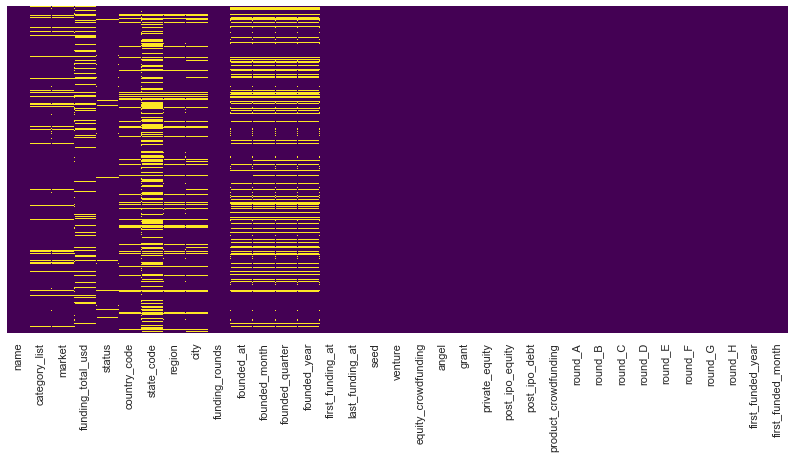

In [114]:
plt.figure(figsize=(14,6)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()

In [115]:
data["funding_total_usd"].replace(0, np.nan, inplace= True)

In [116]:
#df = df[~df.category_list.isna()]
data = data[~data.country_code.isna()]
data = data[~data.market.isna()]
data = data[~data.state_code.isna()]
data = data[~data.region.isna()]
data = data[~data.city.isna()]
data = data[~data.founded_at.isna()]
data = data[~data.founded_month.isna()]
data = data[~data.founded_quarter.isna()]
data = data[~data.founded_year.isna()]
data = data[~data.first_funding_at.isna()]
data = data[~data.first_funded_year.isna()]
data = data[~data.first_funded_month.isna()]
data = data[~data.funding_total_usd.isna()]
data = data[~data.status.isna()]

# Below you can see that we are left with no null values and un-neccessary columns
We lost many records of our data in this way. But it was important so that noisy data affect least to our further work

In [117]:
print("Information of total number of non-empty columns")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(data.info(null_counts=True))

Information of total number of non-empty columns
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19957 entries, 0 to 49437
Data columns (total 35 columns):
name                    19957 non-null object
category_list           19957 non-null object
market                  19957 non-null object
funding_total_usd       19957 non-null float64
status                  19957 non-null object
country_code            19957 non-null object
state_code              19957 non-null object
region                  19957 non-null object
city                    19957 non-null object
funding_rounds          19957 non-null int64
founded_at              19957 non-null object
founded_month           19957 non-null object
founded_quarter         19957 non-null object
founded_year            19957 non-null float64
first_funding_at        19957 non-null datetime64[ns]
last_funding_at         19957 non-null object

# Still we have sufficient records of companies to know how the startup companies and funding ecosystem works

In [118]:
data.shape

(19957, 35)

In [16]:
data.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,first_funded_year
count,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,...,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00,19957.00
mean,19834552.19,2.14,2006.68,314887.40,11943199.32,7501.11,77932.31,163579.93,2732626.29,815422.39,...,11194.95,1828173.82,2467455.05,2089447.29,1423762.78,647234.52,312697.40,57414.26,2505.39,2010.41
std,228053713.33,1.62,7.68,1180141.21,35678180.14,189869.97,513796.26,4226474.99,42419623.48,37180756.09,...,650092.74,6080064.04,10165248.55,10364363.83,14582415.80,7224727.66,9073341.81,3299539.14,353934.07,2.91
min,30.00,1.00,1902.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1979.00
25%,550000.00,1.00,2005.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2009.00
50%,3000000.00,2.00,2009.00,0.00,1431808.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2011.00
75%,13200000.00,3.00,2011.00,100000.00,10065701.00,0.00,0.00,0.00,0.00,0.00,...,0.00,550000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00
max,30079503000.00,18.00,2014.00,100000000.00,1506000000.00,17000000.00,20000000.00,400000000.00,3500000000.00,4700000000.00,...,72000000.00,225000000.00,542000000.00,490000000.00,1200000000.00,400000000.00,1060000000.00,400000000.00,50000000.00,2014.00


# Correlation matrix

In [17]:
data["status"].value_counts()
corr_matrix = data.corr()
corr_matrix

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,angel,grant,private_equity,post_ipo_equity,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,first_funded_year
funding_total_usd,1.00,0.10,-0.06,-0.00,0.18,-0.00,0.00,0.02,0.21,0.19,...,0.00,0.05,0.10,0.13,0.12,0.09,0.08,0.04,0.02,-0.05
funding_rounds,0.10,1.00,-0.04,0.07,0.43,-0.02,0.06,0.02,0.06,0.01,...,0.02,0.18,0.27,0.31,0.20,0.22,0.10,0.07,0.04,-0.35
founded_year,-0.06,-0.04,1.00,0.10,-0.09,0.00,0.03,-0.06,-0.05,-0.05,...,-0.00,0.00,-0.03,-0.04,-0.03,-0.03,-0.01,-0.01,-0.01,0.36
seed,-0.00,0.07,0.10,1.00,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,...,0.30,0.02,-0.00,-0.01,-0.02,-0.02,-0.01,-0.00,-0.00,0.08
venture,0.18,0.43,-0.09,-0.02,1.00,-0.01,0.00,0.02,0.07,0.00,...,-0.00,0.34,0.55,0.65,0.65,0.48,0.41,0.19,0.07,-0.25
equity_crowdfunding,-0.00,-0.02,0.00,-0.01,-0.01,1.00,-0.00,-0.00,-0.00,-0.00,...,0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.04
angel,0.00,0.06,0.03,-0.01,0.00,-0.00,1.00,-0.01,-0.00,-0.00,...,-0.00,0.01,-0.00,0.01,0.02,-0.00,-0.00,-0.00,-0.00,-0.03
grant,0.02,0.02,-0.06,-0.01,0.02,-0.00,-0.01,1.00,0.01,0.00,...,0.00,0.01,0.01,0.02,0.01,0.03,-0.00,-0.00,-0.00,-0.00
private_equity,0.21,0.06,-0.05,-0.01,0.07,-0.00,-0.00,0.01,1.00,0.01,...,-0.00,-0.00,0.02,0.09,0.05,0.04,0.02,0.02,0.02,-0.02
post_ipo_equity,0.19,0.01,-0.05,-0.01,0.00,-0.00,-0.00,0.00,0.01,1.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.01


In [18]:
corr_matrix["venture"].sort_values(ascending=False)

venture                 1.00
round_D                 0.65
round_C                 0.65
round_B                 0.55
round_E                 0.48
funding_rounds          0.43
round_F                 0.41
round_A                 0.34
round_G                 0.19
funding_total_usd       0.18
private_equity          0.07
round_H                 0.07
grant                   0.02
angel                   0.00
post_ipo_equity         0.00
post_ipo_debt          -0.00
product_crowdfunding   -0.00
equity_crowdfunding    -0.01
seed                   -0.02
founded_year           -0.09
first_funded_year      -0.25
Name: venture, dtype: float64

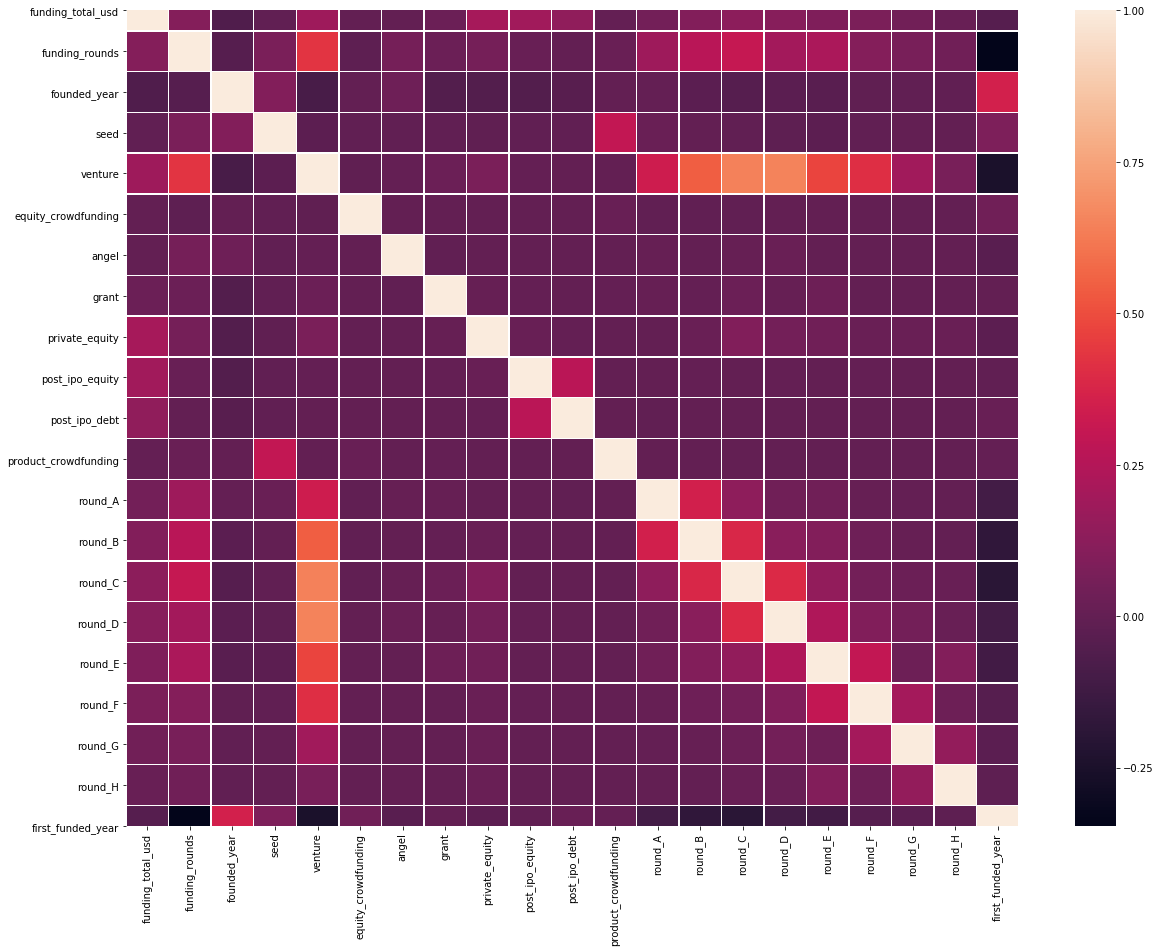

In [19]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), linewidth=0.5);

In [20]:
#df_condition = data.groupby(['city'])['market'].nunique().sort_values(ascending=False)
#df_condition = pd.DataFrame(df_condition).reset_index()
#df_condition.tail(20)

### EDA-exploring data to get some useful insights
Lets understand what is there in this data

In [21]:
data['status'].value_counts()

operating    16802
acquired      2125
closed        1030
Name: status, dtype: int64

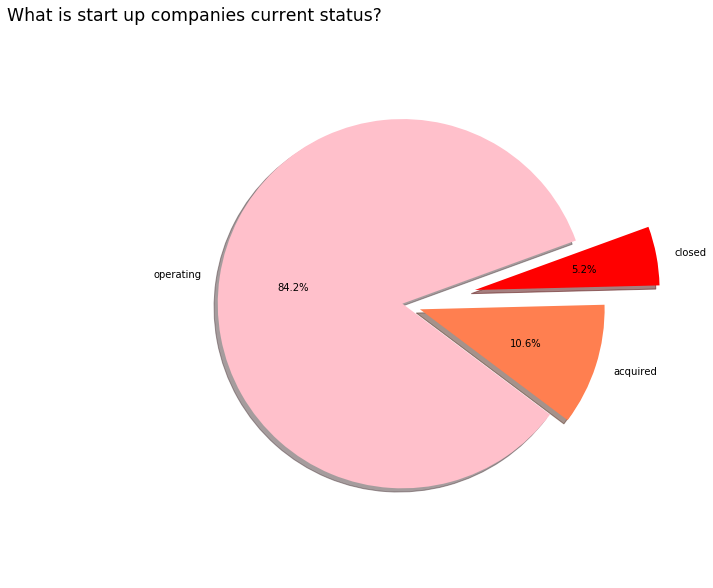

In [22]:
plt.rcParams['figure.figsize'] = 8,8
labels = data['status'].value_counts().index.tolist()
sizes = data['status'].value_counts().tolist()
explode = (0, 0.1,0.4)
colors = ['pink','coral','red']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=20)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status?", fontdict=None, position= [0,0], size = 'xx-large')
plt.show()

 Through above pie-chart we can see that 84.2 % of company in our dataset is operating and around 5.2%% company is already closed. Also 10.6% companies are acquired by other big companies.

# Lets have look into: 
1)market the companies are established in.

2)the different categories of market.

3)top markets in which the people are interseted more toh have business

In [23]:
print("Total different types of market are", len(data['market'].unique()))  


Total different types of market are 653


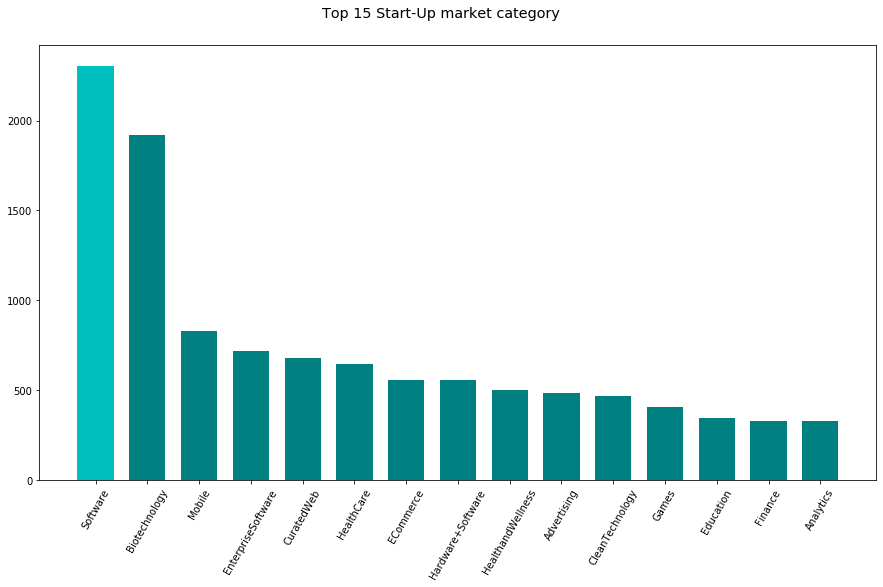

In [24]:
plt.rcParams['figure.figsize'] = 15,8

height = data['market'].value_counts()[:15].tolist()
bars =  data['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['teal']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=60)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [25]:
set_keywords = set()
for liste_keywords in data['category_list'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')

In [26]:
keyword_occurences, dum = count_word(data, 'category_list', set_keywords)

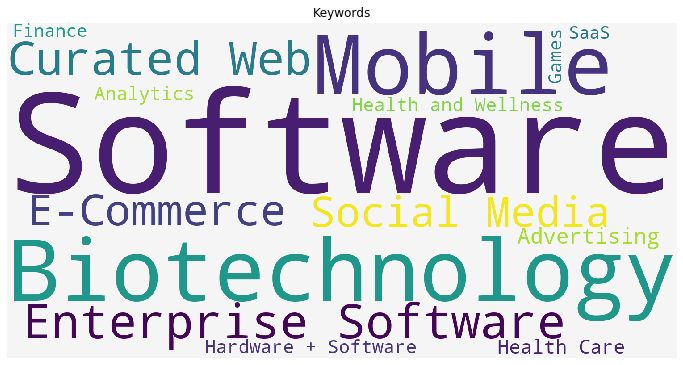

In [27]:
makeCloud(keyword_occurences[0:15],"Keywords","Whitesmoke")

# The below bar chart shows startup has been founded from year 2000

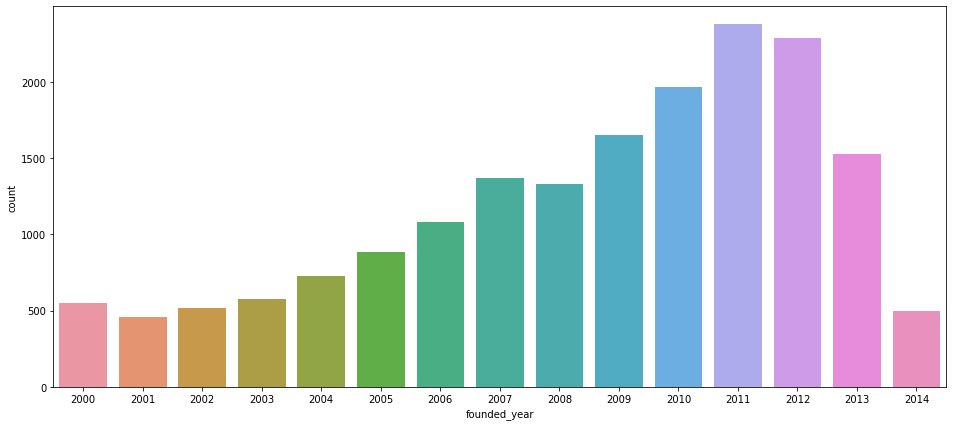

In [28]:
df_new = data[data['founded_year'] >= 2000]
df_new['founded_year'] = df_new['founded_year'].astype(int)
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year', data = df_new)
plt.show()

# Now lets look at the countries in which startup has been founded

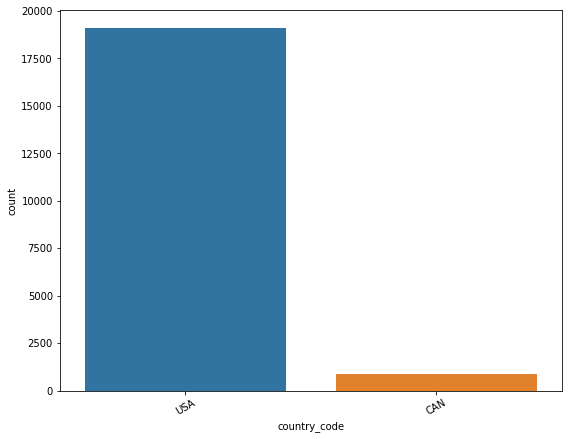

In [29]:
plt.figure(figsize=(9,7))
g = sns.countplot(x ='country_code', data = data, order=data['country_code'].value_counts().iloc[:20].index)
plt.xticks(rotation=30)
plt.show()

Above figure shows that USA has more number of startups compare to others.

# Lets have a look into USA states start-ups, to know more about their growing number

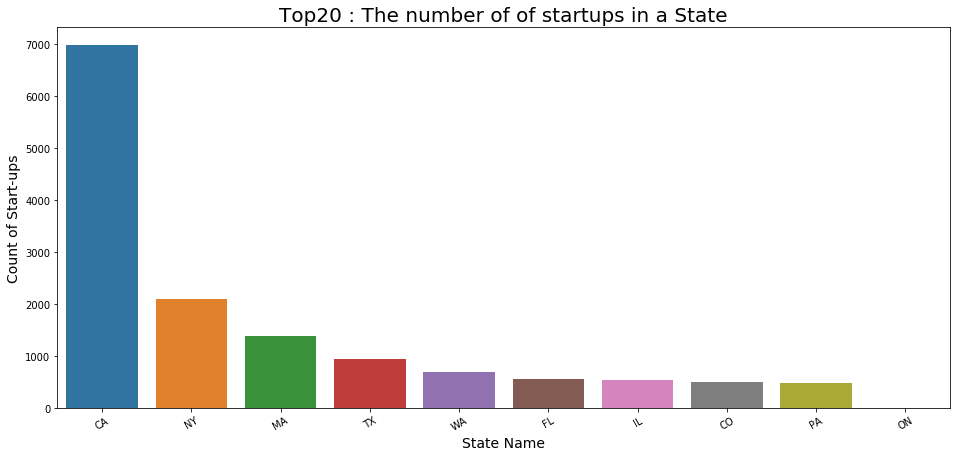

In [30]:
df_USA = data[(data['country_code'] =='USA')]
plt.figure(figsize=(16,7))
g = sns.countplot(x ='state_code', data = df_USA, order=data['state_code'].value_counts().iloc[:10].index)
plt.xlabel("State Name", fontsize = 14)
plt.ylabel("Count of Start-ups", fontsize = 14)
plt.xticks(rotation=30)
plt.title("Top20 : The number of of startups in a State", fontsize = 20)
plt.show()

The above fig shows the number of startup in USA according to states,
california=CA has more number of startups as Silicon Valley is situated in CA

# Lets have a look into USA city start-ups, to know more about their growing number

In [31]:
data1=pd.read_csv("investments_VC.csv")
data1.rename(columns={' funding_total_usd ': "funding_total_usd",' market ': "market"},inplace=True)
data1['funding_total_usd'] = data1['funding_total_usd'].str.replace(',', '')
data1['funding_total_usd'] = data1['funding_total_usd'].str.replace('-', '')
data1['funding_total_usd'] = data1['funding_total_usd'].str.replace(' ', '')

data1['funding_total_usd'] = pd.to_numeric(data1['funding_total_usd'], errors='coerce')

Text(0.5, 1.0, 'Top20 : The number of of startups in a city')

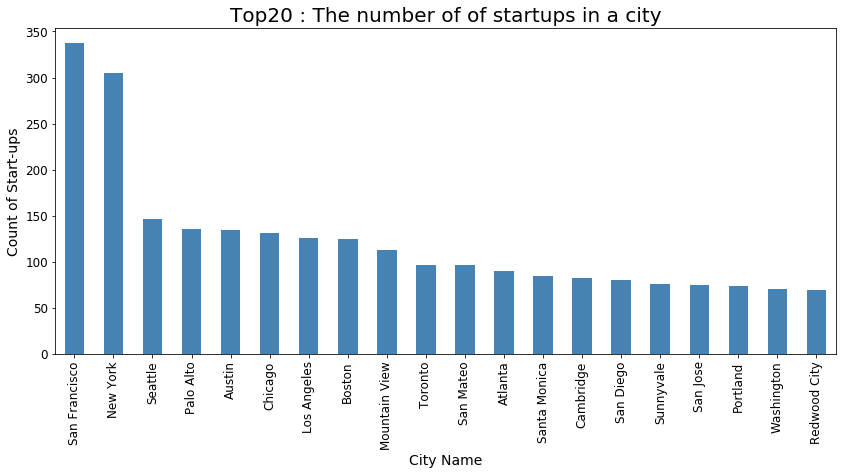

In [32]:
city_market = data.groupby(['city'])['market'].nunique().sort_values(ascending=False)
city_market[0:20].plot(kind="bar", figsize = (14,6), fontsize = 12,color="steelblue")
plt.xlabel("City Name", fontsize = 14)
plt.ylabel("Count of Start-ups", fontsize = 14)
plt.title("Top20 : The number of of startups in a city", fontsize = 20)

## Country_code with Market

In [33]:
data1['count'] = 1
country_market = data1[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

I want to know the different of startup market between USA and our India

In [34]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

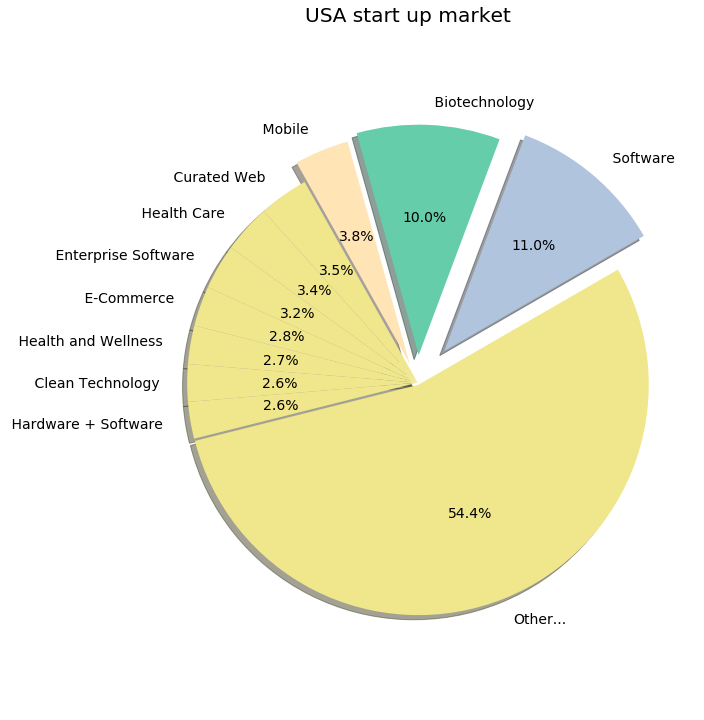

In [35]:
## USA
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['lightsteelblue','mediumaquamarine','moccasin'] +['khaki']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

For USA, Most of start up market is about Software & Technology

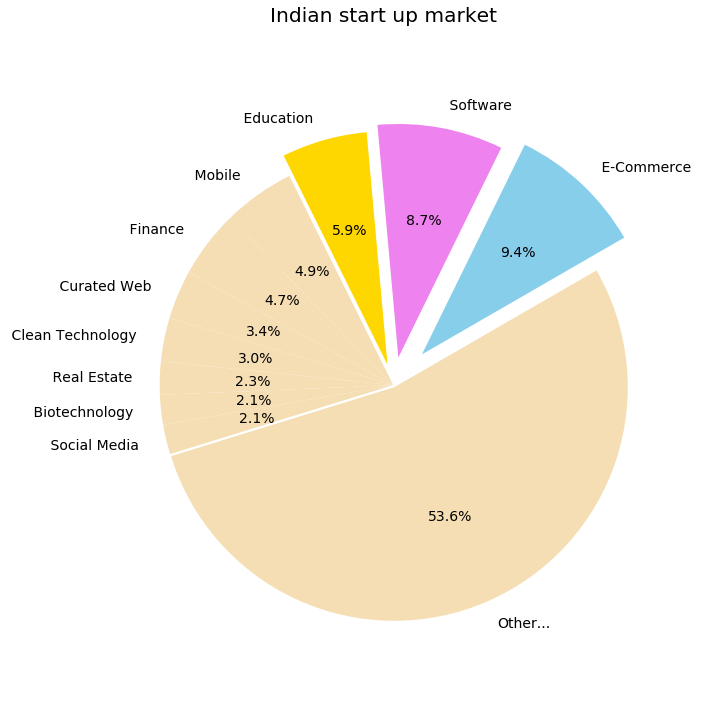

In [36]:
IND_market_pct = country_market_pct[country_market_pct['country_code'] == "IND"]
IND_market_pct = IND_market_pct.sort_values('count',ascending = False)[0:10]
plt.rcParams['figure.figsize'] = 10,10
labels = list(IND_market_pct['market'])+['Other...']
sizes = list(IND_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['skyblue','violet','gold'] +['wheat']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("Indian start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()


For our country(India), The most popular market is E-commerce
    but other category is about Shopping, Marketplace, Social Network . . .
    these two pie charts show how different of interest trend between INDIA and America 

## Total Funding USD

In [37]:
data['funding_total_usd'].max()

30079503000.0

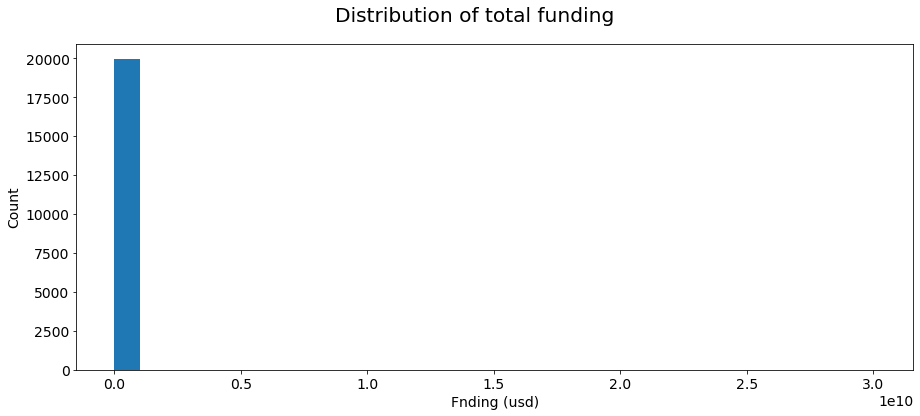

In [38]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(data['funding_total_usd'].dropna(), normed=False, bins=30)
plt.ylabel('Count')
plt.xlabel('Fnding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Seem like it has large gap between the highest value and the lowest,
let ignore outlier first   
we will use the simple remove outlier technique such as 1.5IQR

Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers). Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier

In [39]:
Q1 = data['funding_total_usd'].quantile(0.25)
Q3 = data['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [40]:
without_outlier = data[(data['funding_total_usd'] > lower_bound ) & (data['funding_total_usd'] < upper_bound)]

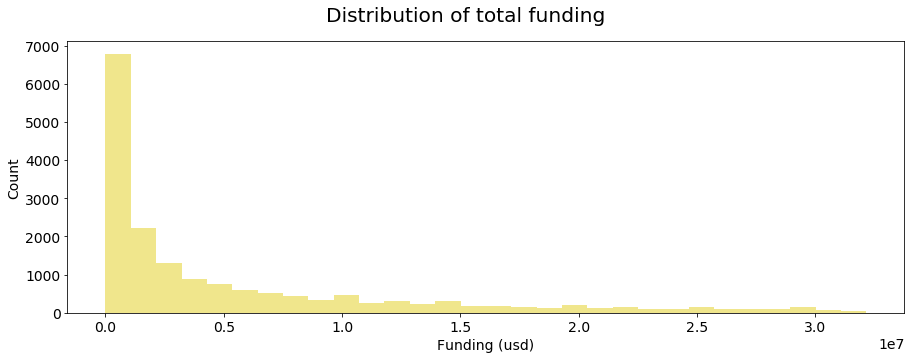

In [41]:
plt.rcParams['figure.figsize'] = 15,5
plt.hist(without_outlier['funding_total_usd'].dropna(), bins=30,color = 'khaki' )

plt.ylabel('Count', fontsize=14)
plt.xlabel('Funding (usd)',fontsize=14)
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

# Above graphs clearly shows average funding is around 15 m usd.

# Now,

Let see the position of well-known company like Facebook, Alibaba, Uber
but those companies are unicorn startup!!.
Then, we need to move hist plot to focus only funding >= 1 billion usd

So for this need to take raw data again, as may some highest leading company data have been lost in case of getting effective results of above questions!

In [42]:
Facebook_total_funding = data1['funding_total_usd'][data1['name']=="Facebook"].values[0]
Uber_total_funding = data1['funding_total_usd'][data1['name']=="Uber"].values[0]
Alibaba_total_funding = data1['funding_total_usd'][data1['name']=="Alibaba"].values[0]
Cloudera_total_funding = data1['funding_total_usd'][data1['name']=="Cloudera"].values[0]
Flipkart_total_funding = data1['funding_total_usd'][data1['name']=="Flipkart"].values[0]

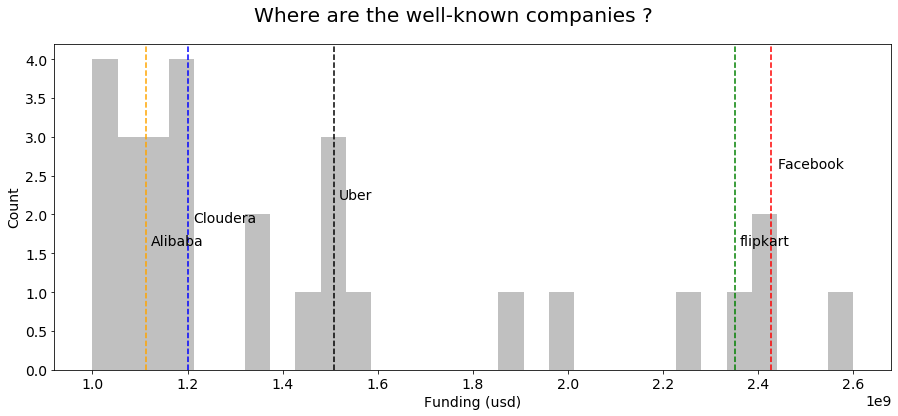

In [43]:
plt.rcParams['figure.figsize'] = 15,6

plt.hist(data1['funding_total_usd'][(data1['funding_total_usd'] >= 1000000000)&(data1['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'silver' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='red',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 2.2,"Uber")

plt.axvline(Cloudera_total_funding,color='blue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")

plt.axvline(Flipkart_total_funding,color='green',linestyle ="--")
plt.text(Flipkart_total_funding+10000000, 1.6,"flipkart")
#plt.ticklabel_format(style='plain')

plt.show()

But..., Are they the highest funding ? 
the answer is no

In [44]:
Verizon_total_funding = data1['funding_total_usd'][data1['name']=="Verizon Communications"].values[0]
Sberbank_total_funding = data1['funding_total_usd'][data1['name']=="Sberbank"].values[0]

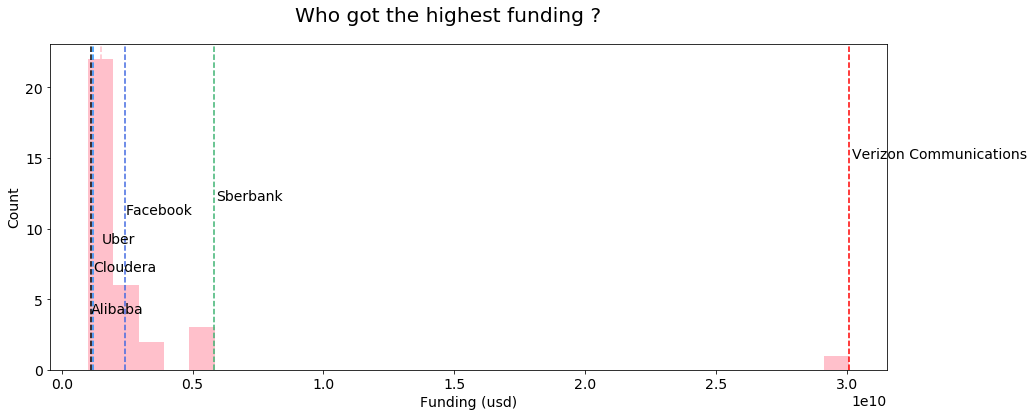

In [45]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(data1['funding_total_usd'][(data1['funding_total_usd'] >= 1000000000)].dropna(), bins=30,color = 'pink' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Who got the highest funding ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 11,"Facebook")

plt.axvline(Uber_total_funding,color='pink',linestyle ="--")
plt.text(Uber_total_funding+10000000, 9,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 7,"Cloudera")

plt.axvline(Alibaba_total_funding,color='k',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 4,"Alibaba")

plt.axvline(Verizon_total_funding,color='red',linestyle ="--")
plt.text(Verizon_total_funding+100000000, 15,"Verizon Communications")

plt.axvline(Sberbank_total_funding,color='mediumseagreen',linestyle ="--")
plt.text(Sberbank_total_funding+100000000, 12,"Sberbank")

plt.show()

The most funding company in this dataset is "Verizon communication" which has total fund around 30,000,000,000 usd

## Found at 

In [46]:
data1['founded_at'].head()

0    01-06-2012
1           NaN
2    26-10-2012
3    01-04-2011
4    01-01-2014
Name: founded_at, dtype: object

This column is provided in term of string format which we need to convert to datetime firs

In [47]:
data1['founded_at'] = pd.to_datetime(data1['founded_at'], errors = 'coerce' )


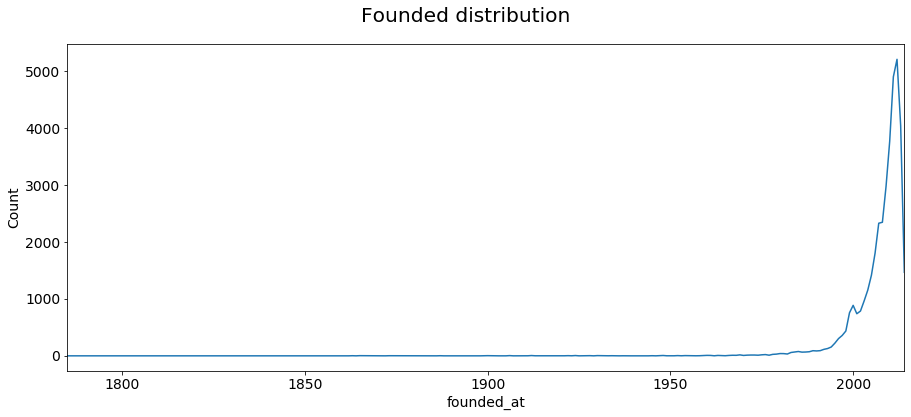

In [48]:
plt.rcParams['figure.figsize'] = 15,6
data1['name'].groupby(data1["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [49]:
Facebook_founded_year = data1['founded_at'][data1['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = data1['founded_at'][data1['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = data1['founded_at'][data1['name']=="Alibaba"].dt.year.values[0]
Flipkart_founded_year=data1['founded_at'][data1['name']=="Flipkart"].dt.year.values[0]

In [50]:
Uber_founded_year

2009

In [51]:
Flipkart_founded_year

2007

In [52]:
Alibaba_founded_year

1999

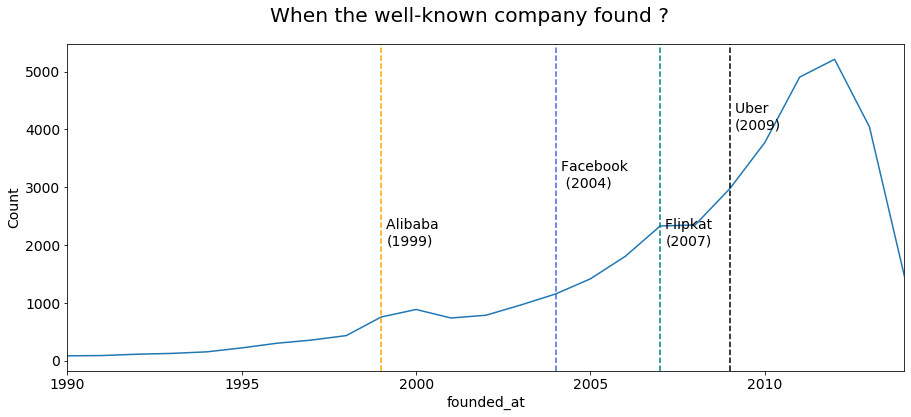

In [53]:
plt.rcParams['figure.figsize'] = 15,6
data1['name'][data1["founded_at"].dt.year >= 1990].groupby(data1["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")

plt.axvline(Flipkart_founded_year,color='teal',linestyle ="--")
plt.text(Flipkart_founded_year+0.15, 2000,"Flipkat \n(2007)")

plt.title("When the well-known company found ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

# Funding Analysis

##### Funding Overview`

In [54]:
funding_information(data1,"Dropbox")

Company :  Dropbox
Total Funding :  1107215000.0  $
Seed Funding :  15000  $
Angle Funding : 0  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  500000000  $
Private Equity :  0  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  607200000  $
Round A funding :  7200000  $
Round B funding :  250000000  $
Round C funding :  350000000  $
Round D funding :  0  $
Round E funding :  0  $
Round F funding :  0  $
Round G funding :  0  $
Round H funding :  0  $


In [55]:
funding_information(data1,"Flipkart")

Company :  Flipkart
Total Funding :  2351140000.0  $
Seed Funding :  0  $
Angle Funding : 140000  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  0  $
Private Equity :  0  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  2351000000  $
Round A funding :  1000000  $
Round B funding :  10000000  $
Round C funding :  20000000  $
Round D funding :  150000000  $
Round E funding :  360000000  $
Round F funding :  210000000  $
Round G funding :  1000000000  $
Round H funding :  600000000  $


In [56]:
funding_information(data1,"Facebook")

Company :  Facebook
Total Funding :  2425700000.0  $
Seed Funding :  0  $
Angle Funding : 500000  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  100000000  $
Private Equity :  1710000000  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  615200000  $
Round A funding :  12700000  $
Round B funding :  27500000  $
Round C funding :  375000000  $
Round D funding :  200000000  $
Round E funding :  0  $
Round F funding :  0  $
Round G funding :  0  $
Round H funding :  0  $


In [57]:
funding_information(data1,"Netflix")

Company :  Netflix
Total Funding :  230000000.0  $
Seed Funding :  0  $
Angle Funding : 0  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  200000000  $
Private Equity :  30000000  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  0  $
Round A funding :  0  $
Round B funding :  0  $
Round C funding :  0  $
Round D funding :  0  $
Round E funding :  0  $
Round F funding :  0  $
Round G funding :  0  $
Round H funding :  0  $


In [58]:
funding_information(data1,"Alibaba")

Company :  Alibaba
Total Funding :  1112000000.0  $
Seed Funding :  0  $
Angle Funding : 5000000  $
Grant Funding :  0  $
Product Crowd Funding :  0  $
Equity Crowd Funding :  0  $
Undisclode Funding :  0  $
Convertible Note :  0  $
Debt Financing :  0  $
Private Equity :  1107000000  $
PostIPO Equity :  0  $
PostIPO Debt :  0  $
Secondary Market :  0  $
Venture Funding :  0  $
Round A funding :  0  $
Round B funding :  0  $
Round C funding :  0  $
Round D funding :  0  $
Round E funding :  0  $
Round F funding :  0  $
Round G funding :  0  $
Round H funding :  0  $


Seed funding

Seed funding is the first official equity funding stage. 
It typically represents the first official money that a business venture or enterprise raises; 
some companies never extend beyond seed funding into Series A rounds or beyond.




There are other types of funding rounds available to startups, depending upon the industry and the level of interest among potential investors. It's not uncommon for startups to engage in what is known as "seed" funding or angel investor funding at the outset. Next, these funding rounds can be followed by Series A, B, and C funding rounds, as well as additional efforts to earn capital as well, if appropriate. Series A, B, and C are necessary ingredients for a business that decides “bootstrapping,” or merely surviving off of the generosity of friends, family, and the depth of their own pockets, will not suffice.

In [59]:
data[['name','seed']].head(5)

,name,seed
0,#waywire,1750000
4,-R- Ranch and Mine,0
13,1-800-DOCTORS,0
16,10-20 Media,0
17,1000 Corks,40000


In [60]:
data[['name','angel']].head(5)

,name,angel
0,#waywire,0
4,-R- Ranch and Mine,0
13,1-800-DOCTORS,0
16,10-20 Media,0
17,1000 Corks,0


In [61]:
data[['name','venture']].head(5)

,name,venture
0,#waywire,0
4,-R- Ranch and Mine,0
13,1-800-DOCTORS,0
16,10-20 Media,0
17,1000 Corks,0



Average funding in this stage ?
Note we need to beware when use the mean value
 Most of value in this column is 0, they will drag your average value down
 The solution is using data which is not 0 to find average

In [62]:
print("The average of seed funding stage is around ",data['seed'][data['seed'] != 0].mean(), "$")

The average of seed funding stage is around  989016.0192005036 $


In [63]:
print("The average of seed funding stage is around ",data['seed'][data['grant'] != 0].mean(), "$")

The average of seed funding stage is around  302232.9583333333 $


In [64]:
print("The average of seed funding stage is around ",data['seed'][data['angel'] != 0].mean(), "$")

The average of seed funding stage is around  265409.7763888889 $


How many company get funding in seed stage ?

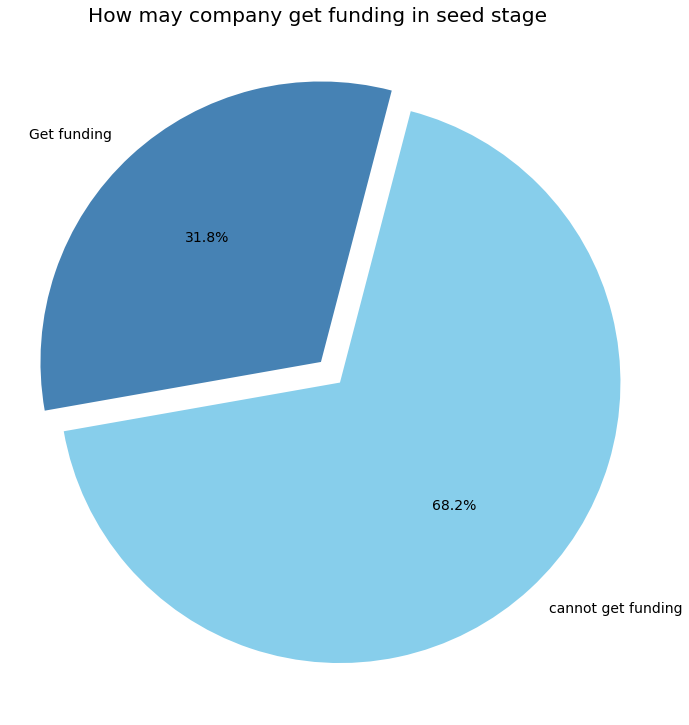

In [65]:
data['get_funding_in_seed'] = data['seed'].map(lambda s :1  if s > 0 else 0)
plt.rcParams['figure.figsize'] =10,10
labels = ['cannot get funding','Get funding']
sizes = data['get_funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['skyblue','steelblue'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How may company get funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [66]:
## Remove Outlier first 

Q1 = data1['seed'][data1['seed'] != 0].quantile(0.25)
Q3 = data1['seed'][data1['seed'] != 0].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
without_outlier = data1[(data1['seed'] > lower_bound ) & (data1['seed'] < upper_bound)]

In [67]:
Facebook_seed_funding = data1['seed'][data1['name']=="Facebook"].values[0]
Uber_seed_funding   = data1['seed'][data1['name']=="Uber"].values[0]
Dropbox_seed_funding   = data1['seed'][data1['name']=="Dropbox"].values[0]
Flipkart_seed_funding   = data1['seed'][data1['name']=="Flipkart"].values[0]
Netflix_seed_funding   = data1['seed'][data1['name']=="Netflix"].values[0]
Alibaba_seed_funding   = data1['seed'][data1['name']=="Alibaba"].values[0]

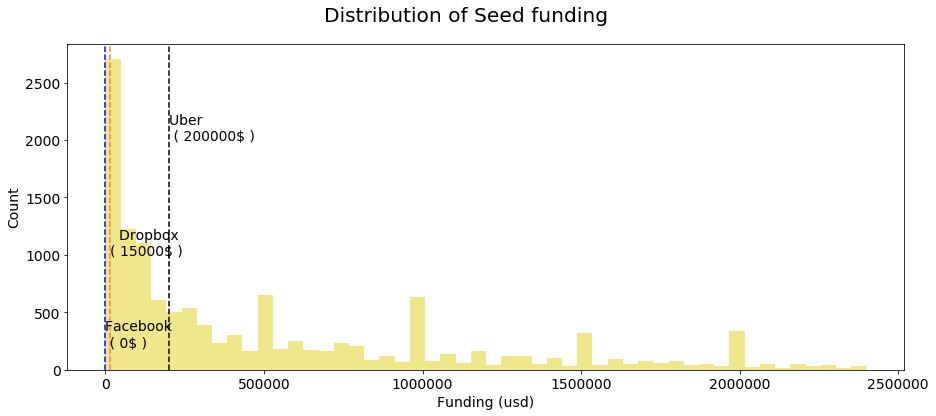

In [68]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['seed'][without_outlier['seed']!=0].dropna(), bins=50,color = 'khaki' )

plt.axvline(Facebook_seed_funding,color='blue',linestyle ="--")
plt.text(Facebook_seed_funding+0.15, 200,"Facebook \n ( 0$ )")

plt.axvline(Uber_seed_funding,color='black',linestyle ="--")
plt.text(Uber_seed_funding+0.15, 2000,"Uber \n ( 200000$ )")

plt.axvline(Dropbox_seed_funding,color='coral',linestyle ="--")
plt.text(Dropbox_seed_funding+0.15, 1000,"  Dropbox \n( 15000$ )")




plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of Seed funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

### Angel funding

Who is angel? 

An angel investor (also known as a private investor, seed investor or angel funder) 
is a high net worth individual who provides financial backing for small startups or entrepreneurs,
typically in exchange for ownership equity in the company. Often, angel investors are found among
an entrepreneur's family and friends.
The funds that angel investors provide may be a one-time investment to help the business get off the ground 
or an ongoing injection to support and carry the company through its difficult early stages.

In [69]:
print("The average of Angel funding is around ",data['angel'][data['angel'] != 0].mean(), "$")

The average of Angel funding is around  1080066.107638889 $


In [70]:
data['get_funding_in_angel'] = data['angel'].map(lambda s :"Get funding"  if s > 0 else "Not get funding")



print("Only " , data['get_funding_in_angel'].value_counts().values[1], " companies has angel investor")
print("while " , data['get_funding_in_angel'].value_counts().values[0], " are not")
print("~",data['get_funding_in_angel'].value_counts().values[1]/(data['get_funding_in_angel'].value_counts().values[1]
+data['get_funding_in_angel'].value_counts().values[0]) *100, "percent")

Only  1440  companies has angel investor
while  18517  are not
~ 7.215513353710477 percent


#### Investment in each round

Depending on the type of industry and investors, a funding round can take anywhere from three months to over a year. The time between each round can vary between six months to one year. Funds are offered by investors, usually angel investors or venture capital firms, which then receive a stake in the startup

In [71]:
data['round_A'][data['round_A'] != 0].mean()

7087192.096348097

In [72]:
data['round_B'][data['round_B'] != 0].mean()

14277471.829805741

In [73]:
data['round_C'][data['round_C'] != 0].mean()

21081445.687563196

In [74]:
data['round_D'][data['round_D'] != 0].mean()

29690735.359456636

In [75]:
data['round_E'][data['round_D'] != 0].mean()

10286917.575757576

In [76]:
data['round_F'][data['round_F'] != 0].mean()

47276530.053030305

In [77]:
data['round_H'][data['round_H'] != 0].mean()

50000000.0

In [78]:
data['round_G'][data['round_G'] != 0].mean()

47742352.708333336

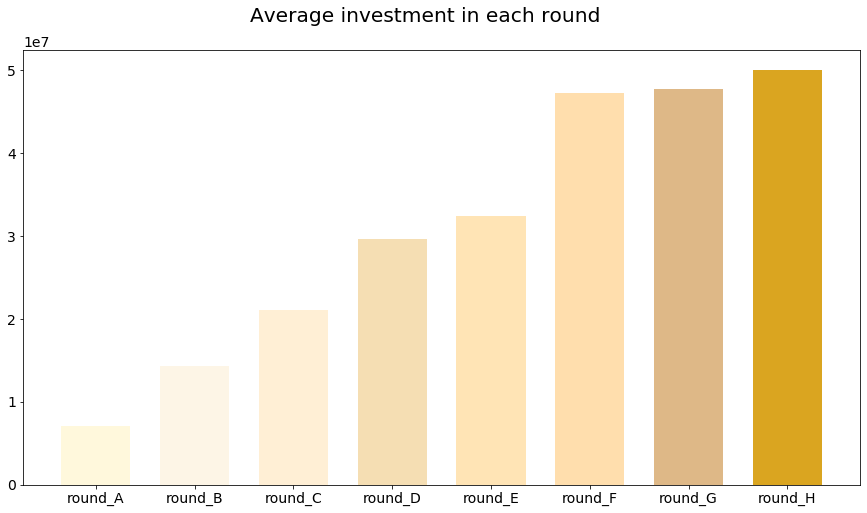

In [79]:
round = ['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']
amount = [data['round_A'][data['round_A'] != 0].mean(),
          data['round_B'][data['round_B'] != 0].mean(),
          data['round_C'][data['round_C'] != 0].mean(),
          data['round_D'][data['round_D'] != 0].mean(),
          data['round_E'][data['round_E'] != 0].mean(),
          data['round_F'][data['round_F'] != 0].mean(),
          data['round_G'][data['round_G'] != 0].mean(),
         data['round_H'][data['round_H'] != 0].mean()]



plt.rcParams['figure.figsize'] = 15,8

height = amount
bars =  round
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7, color= ['cornsilk','oldlace','papayawhip','wheat','moccasin','navajowhite','burlywood','goldenrod'] )
plt.xticks(y_pos, bars)
plt.title("Average investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

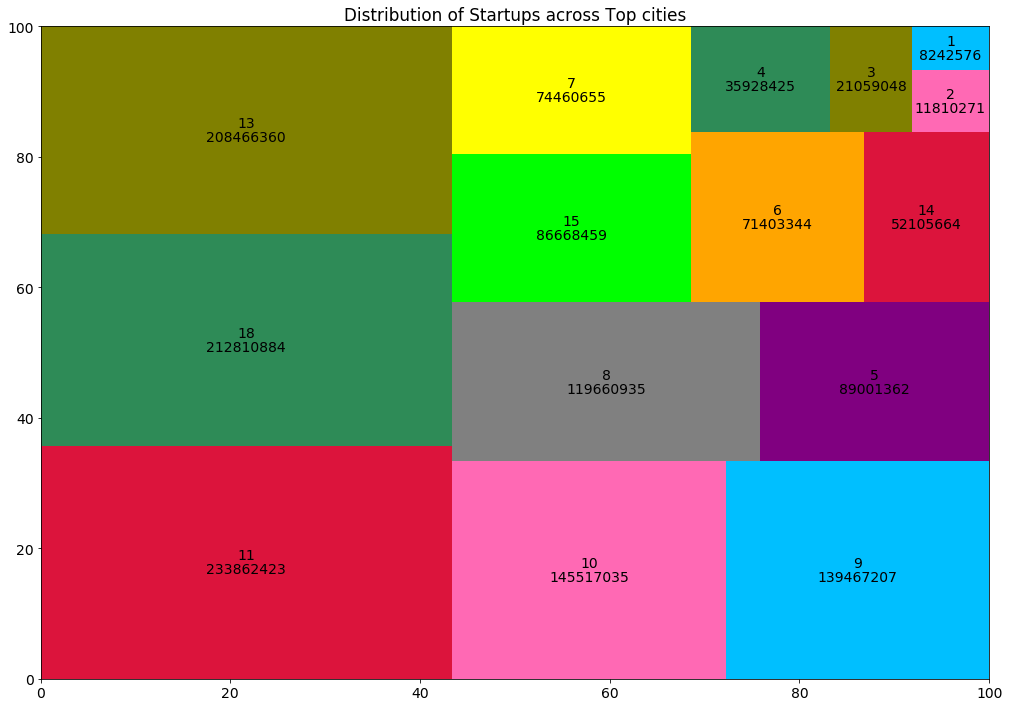

In [80]:
import squarify
plt.figure(figsize=(17,12))
mean_amount = data.groupby("funding_rounds").mean()["funding_total_usd"].astype('int').sort_values(ascending=False).iloc[1:].head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values,color=['crimson','seagreen','olive','hotpink','deepskyblue','grey','purple','lime','yellow','orange'])
plt.title('Distribution of Startups across Top cities')

Text(0.5, 1.0, "Startups's,seed and angel in India by region")

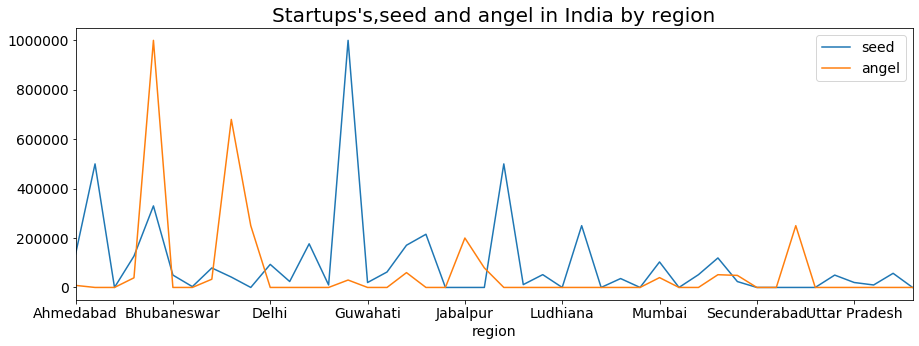

In [81]:
#The average funding from seed and angel funding in india by region

gbf=data1[(data1['country_code'] == 'IND')]
rg= gbf.groupby('region').mean()
fr=rg.plot(kind ='line', y=['seed','angel'], figsize=(15,5))

fr.set_title('Startups\'s,seed and angel in India by region',fontsize=(20))

Text(0.5, 1.0, "Startups's,e funding from seed and angel in india by market in  india by market")

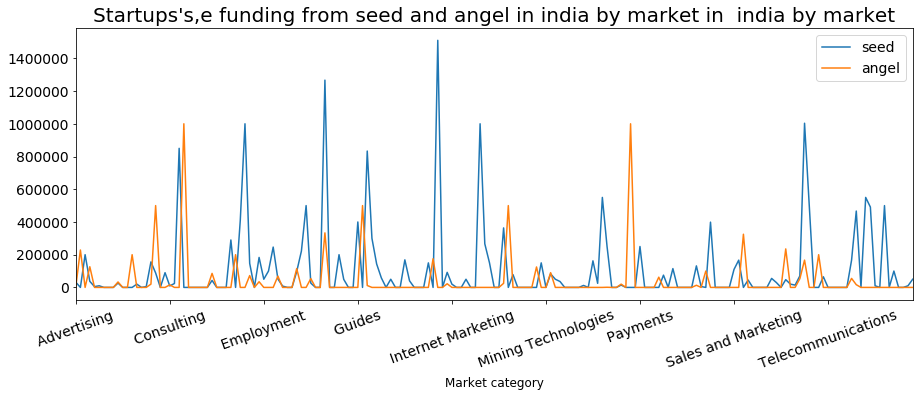

In [82]:
#The average funding from seed and angel in india by market

gbf=data1[(data1['country_code'] == 'IND')]
rg= gbf.groupby('market').mean()
fr=rg.plot(kind ='line', y=['seed','angel'], figsize=(15,5))
plt.xticks(rotation=20)
plt.xlabel("Market category", fontsize=12)
fr.set_title('Startups\'s,e funding from seed and angel in india by market in  india by market',fontsize=(20))

Text(0.5, 1.0, "Startups's,equity_financing in  india by region")

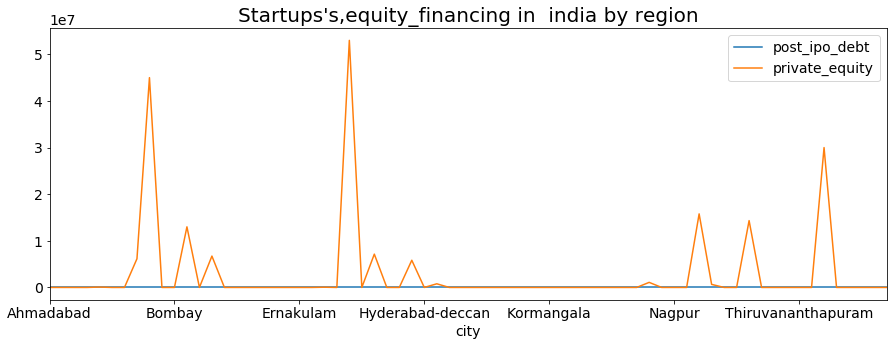

In [83]:
#The average funding from grant and debt_financing in india by region

gbf=data1[(data1['country_code'] == 'IND')]
rg= gbf.groupby('city').mean()
fr=rg.plot(kind ='line', y=['post_ipo_debt','private_equity'], figsize=(15,5))

fr.set_title('Startups\'s,equity_financing in  india by region',fontsize=(20))

## Time series

A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

In [84]:
x=data[["founded_year", "seed","venture"]]
x.head()

,founded_year,seed,venture
0,2012.00,1750000,0
4,2014.00,0,0
13,1984.00,0,0
16,2001.00,0,0
17,2008.00,40000,0


In [85]:
data['seed_YN'] = ['yes' if x>0 else 'no' for x in data['seed']]
data['venture_YN'] = ['yes' if x>0 else 'no' for x in data['venture']]
data['grant_YN'] = ['yes' if x>0 else 'no' for x in data['grant']]
data['angel_YN'] = ['yes' if x>0 else 'no' for x in data['angel']]
data

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,round_G,round_H,first_funded_year,first_funded_month,get_funding_in_seed,get_funding_in_angel,seed_YN,venture_YN,grant_YN,angel_YN
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,New York,1,...,0,0,2012.00,June,1,Not get funding,yes,no,no,no
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,Fort Worth,2,...,0,0,2014.00,August,0,Not get funding,no,no,no,no
13,1-800-DOCTORS,|Health and Wellness|,HealthandWellness,1750000.00,operating,USA,NJ,Newark,Iselin,1,...,0,0,2011.00,February,0,Not get funding,no,no,no,no
16,10-20 Media,|E-Commerce|,ECommerce,2050000.00,operating,USA,MD,Baltimore,Woodbine,4,...,0,0,2009.00,June,0,Not get funding,no,no,no,no
17,1000 Corks,|Search|,Search,40000.00,operating,USA,OR,"Portland, Oregon",Lake Oswego,1,...,0,0,2011.00,August,1,Not get funding,yes,no,no,no
20,1000memories,|Curated Web|,CuratedWeb,2535000.00,acquired,USA,CA,SF Bay Area,San Francisco,2,...,0,0,2010.00,January,1,Not get funding,yes,yes,no,no
21,1000museums.com,|Curated Web|,CuratedWeb,4962651.00,operating,USA,WA,Seattle,Bellevue,6,...,0,0,2009.00,October,0,Not get funding,no,yes,no,no
26,100health,|Health Care Information Technology|,HealthCareInformationTechnology,420000.00,operating,USA,WI,Madison,Madison,1,...,0,0,2014.00,November,1,Not get funding,yes,no,no,no
27,100Plus,|Analytics|,Analytics,1250000.00,acquired,USA,CA,SF Bay Area,San Francisco,2,...,0,0,2011.00,February,1,Not get funding,yes,yes,no,no
28,1010data,|Software|,Software,35000000.00,operating,USA,NY,New York City,New York,1,...,0,0,2010.00,August,0,Not get funding,no,yes,no,no


In [86]:
group_seed=pd.DataFrame(data.groupby('seed_YN').get_group('yes'))
group_venture=pd.DataFrame(data.groupby('venture_YN').get_group('yes'))
group_grant=pd.DataFrame(data.groupby('grant_YN').get_group('yes'))
group_angel=pd.DataFrame(data.groupby('angel_YN').get_group('yes'))

In [87]:
print(group_seed.shape,group_venture.shape,group_grant.shape, group_angel.shape)

(6354, 41) (12561, 41) (480, 41) (1440, 41)


In [88]:
x=pd.DataFrame(group_seed[['founded_year', 'seed_YN']].groupby(["founded_year"])['seed_YN'].count())
y=pd.DataFrame(group_venture[['founded_year', 'venture_YN']].groupby(["founded_year"])['venture_YN'].count())
z=pd.DataFrame(group_grant[['founded_year', 'grant_YN']].groupby(["founded_year"])['grant_YN'].count())
w=pd.DataFrame(group_angel[['founded_year', 'angel_YN']].groupby(["founded_year"])['angel_YN'].count())

In [89]:
new=x.merge(y.merge(z.merge(w, on='founded_year'), on='founded_year'), on="founded_year")
new

,seed_YN,venture_YN,grant_YN,angel_YN
founded_year,,,,
1981.00,1,14,2,1
1985.00,4,31,3,1
1992.00,7,47,3,1
1995.00,11,97,4,1
1996.00,11,141,6,4
1997.00,9,172,5,2
1998.00,14,212,5,5
1999.00,20,426,11,10
2000.00,35,481,8,9


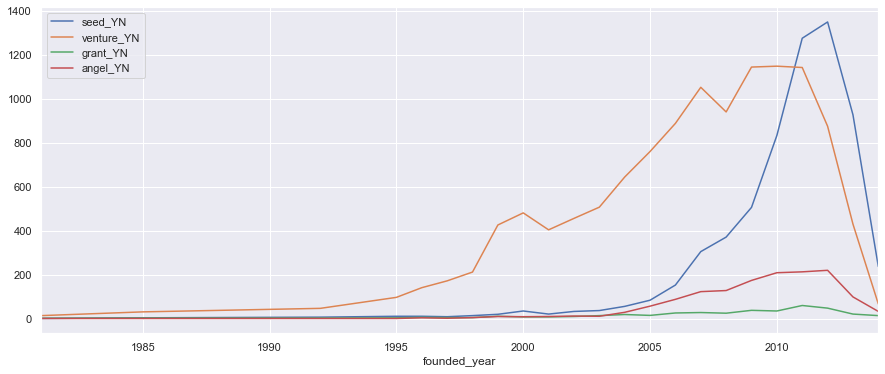

In [90]:
sns.set()
plt.rcParams['figure.figsize'] = 15,6
new.plot()

In [91]:
group_closed=pd.DataFrame(data.groupby('status').get_group('closed'))
group_acquired=pd.DataFrame(data.groupby('status').get_group('acquired'))
group_operating=pd.DataFrame(data.groupby('status').get_group('operating'))

In [92]:
a=pd.DataFrame(group_closed[['founded_year', 'status']].groupby(["founded_year"])['status'].count())
b=pd.DataFrame(group_acquired[['founded_year', 'status']].groupby(["founded_year"])['status'].count())
c=pd.DataFrame(group_operating[['founded_year', 'status']].groupby(["founded_year"])['status'].count())

In [93]:
new1=a.merge(b.merge(c, on='founded_year'), on='founded_year')

In [94]:
new1=new1.rename(columns={"status":"closed", "status_x":"acquired", "status_y":"operating"})

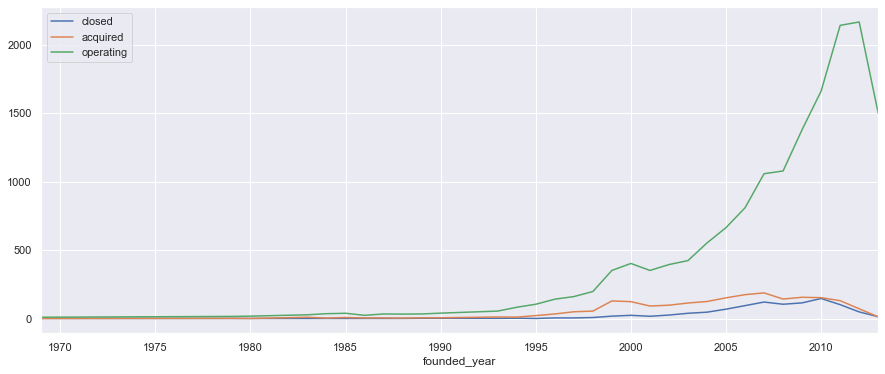

In [95]:
sns.set()
plt.rcParams['figure.figsize'] = 15,6
new1.plot()

In [96]:
dataset=data[["name","seed","venture","angel","grant","equity_crowdfunding"]]
dataset.head()

,name,seed,venture,angel,grant,equity_crowdfunding
0,#waywire,1750000,0,0,0,0
4,-R- Ranch and Mine,0,0,0,0,60000
13,1-800-DOCTORS,0,0,0,0,0
16,10-20 Media,0,0,0,0,0
17,1000 Corks,40000,0,0,0,0


In [97]:
angel='angel',len(dataset['angel'][dataset['angel'] != 0])
venture="venture",len(dataset['venture'][dataset['venture'] != 0])
seed="seed",len(dataset['seed'][dataset['seed'] != 0])
grant="grant",len(dataset['grant'][dataset['grant'] != 0])
equity_crowdfunding="equity_crowdfunding",len(dataset['equity_crowdfunding'][dataset['equity_crowdfunding'] != 0])
print(angel,venture,seed,grant,equity_crowdfunding)

('angel', 1440) ('venture', 12561) ('seed', 6354) ('grant', 480) ('equity_crowdfunding', 344)


In [98]:
closed=np.array([len(group_closed['angel'][group_closed['angel'] != 0]),
len(group_closed['venture'][group_closed['venture'] != 0]),
len(group_closed['seed'][group_closed['seed'] != 0]),
len(group_closed['grant'][group_closed['grant'] != 0]),
len(group_closed['equity_crowdfunding'][group_closed['equity_crowdfunding'] != 0])])
closed=pd.DataFrame(closed, columns=['closed'])

In [99]:
acquired=np.array([len(group_acquired['angel'][group_acquired['angel'] != 0]),
len(group_acquired['venture'][group_acquired['venture'] != 0]),
len(group_acquired['seed'][group_acquired['seed'] != 0]),
len(group_acquired['grant'][group_acquired['grant'] != 0]),
len(group_acquired['equity_crowdfunding'][group_acquired['equity_crowdfunding'] != 0])])
acquired=pd.DataFrame(acquired, columns=['acquired'])

In [100]:
operating=np.array([len(group_operating['angel'][group_operating['angel'] != 0]),
len(group_operating['venture'][group_operating['venture'] != 0]),
len(group_operating['seed'][group_operating['seed'] != 0]),
len(group_operating['grant'][group_operating['grant'] != 0]),
len(group_operating['equity_crowdfunding'][group_operating['equity_crowdfunding'] != 0])])
operating=pd.DataFrame(operating, columns=['operating'])

In [101]:
data=[('angel', 3129), ('venture', 23277), ('seed', 13840), ('grant', 1142), ('equity_crowdfunding', 517)]
       
funding_count = pd.DataFrame(data, columns=['funding_types', "count"]) 
funding_count["Closed"]=closed
funding_count["Acquired"]=acquired
funding_count["Operating"]=operating

Text(0, 0.5, 'Status')

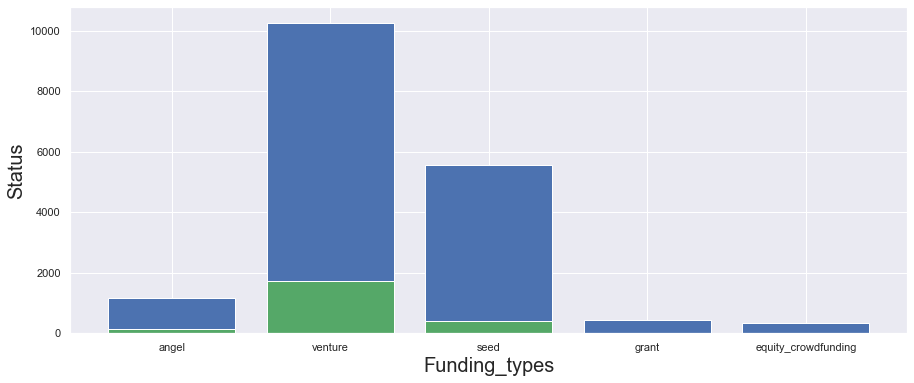

In [102]:
plt.bar(funding_count["funding_types"], funding_count['Operating'])
plt.bar(funding_count["funding_types"], funding_count['Closed'])
plt.bar(funding_count["funding_types"], funding_count['Acquired'])
plt.xlabel("Funding_types", fontsize=20)
plt.ylabel("Status", fontsize=20)

TypeError: list indices must be integers or slices, not str

# ML Models

### Linear regression

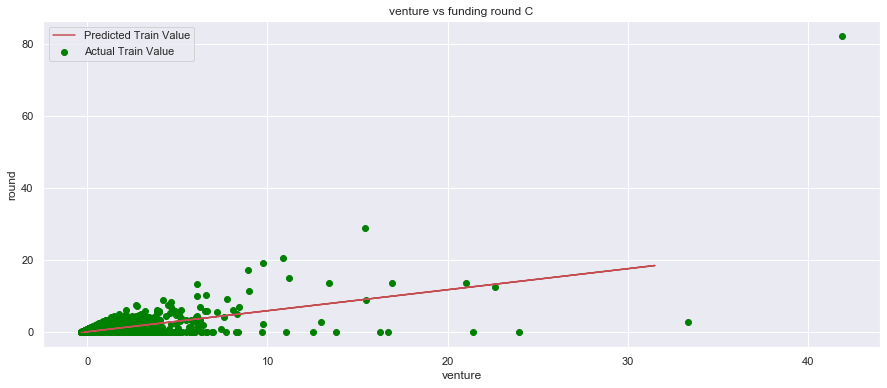

In [119]:
linearRegressor = LinearRegression()

y=data["round_D"].values.reshape(-1,1)
x=data["venture"].values.reshape(-1,1)

x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)


xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y_scaled, test_size = 0.2, random_state = 0)
linearRegressor.fit(xTrain,yTrain)

y_pred = linearRegressor.predict(xTest)
linearRegressor.score(xTest,y_pred)
plt.scatter(xTrain, yTrain, color = 'green', marker='o', label='Actual Train Value')
plt.plot(xTest, y_pred, color = 'r', label='Predicted Train Value')
plt.title('venture vs funding round C')
plt.legend()
plt.xlabel('venture')
plt.ylabel('round')
plt.show()

as we can see the relation between venture funding and round C funding funding rounds are similar to venture funding , thats why they are co linear

In [120]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(xTrain)
Y_train_minmax = min_max_scaler.fit_transform(yTrain)
X_test_minmax = min_max_scaler.transform(xTest)
Y_test_minmax = min_max_scaler.transform(yTest)
linearRegressor.fit(X_train_minmax,Y_train_minmax)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
linearRegressor.fit(X_train_minmax,Y_train_minmax)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
y_pred = linearRegressor.predict(X_test_minmax)
linearRegressor.score(X_test_minmax,y_pred)

1.0

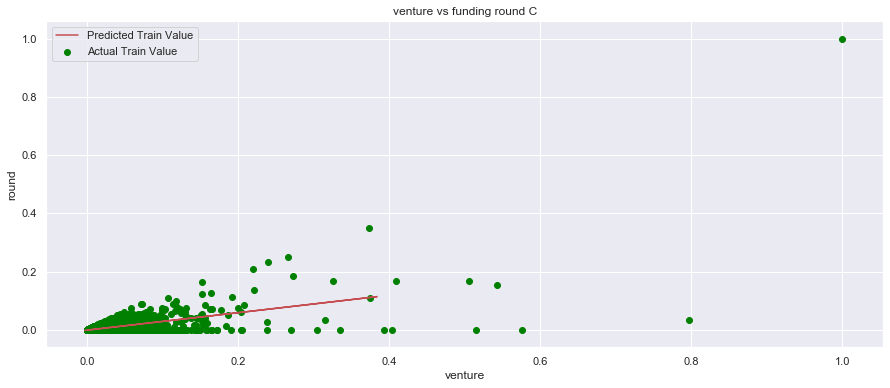

In [123]:
plt.scatter(X_train_minmax, Y_train_minmax, color='green', marker='o', label='Actual Train Value')
plt.plot(X_test_minmax, y_pred, color ='r', label='Predicted Train Value')
plt.title('venture vs funding round C')
plt.legend()
plt.xlabel('venture')
plt.ylabel('round')
plt.show()

This is the same regression just we have used min max scaler to remove any outliers and adjust the scale

In [124]:
xx=data["post_ipo_debt"].values.reshape(-1,1)
yy=data["post_ipo_equity"].values.reshape(-1,1)
X = min_max_scaler.fit_transform(xx)
Y= min_max_scaler.fit_transform(yy)

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

linearRegressor.fit(xTrain,yTrain)

ypred = linearRegressor.predict(xTest)



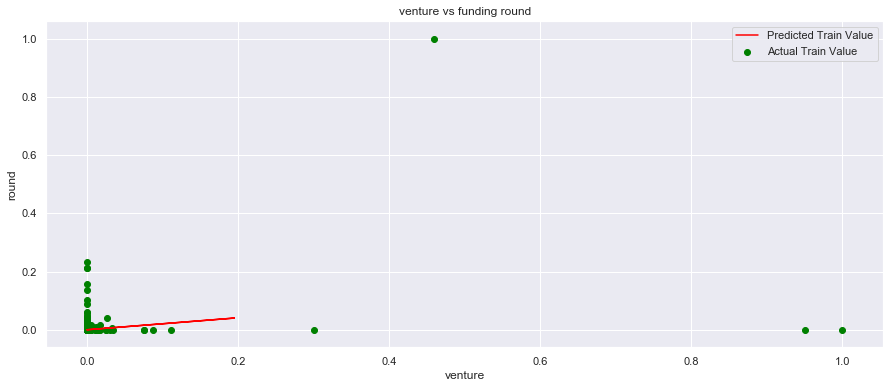

In [125]:
plt.scatter(xTrain, yTrain, color = 'green', marker='o', label='Actual Train Value')
plt.plot(xTest, ypred, color = 'red', label='Predicted Train Value')
plt.title('venture vs funding round')
plt.legend()
plt.xlabel('venture')
plt.ylabel('round')
plt.show()

This fig shows relaption between post ipo equity and debt

## Classification

In [126]:
df2=data[['status','founded_year','funding_total_usd']]
df2.head()

,status,founded_year,funding_total_usd
0,acquired,2012.00,1750000.00
4,operating,2014.00,60000.00
13,operating,1984.00,1750000.00
16,operating,2001.00,2050000.00
17,operating,2008.00,40000.00


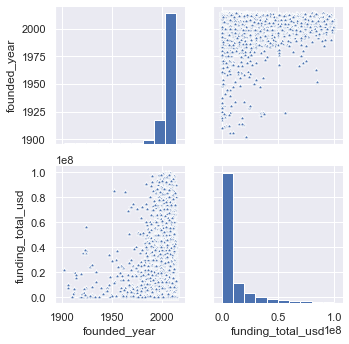

In [127]:
g = sns.pairplot(df2[df2['funding_total_usd']<100000000],markers='*')

In [128]:
#data.groupby(['status'])['funding_total_usd'].describe()

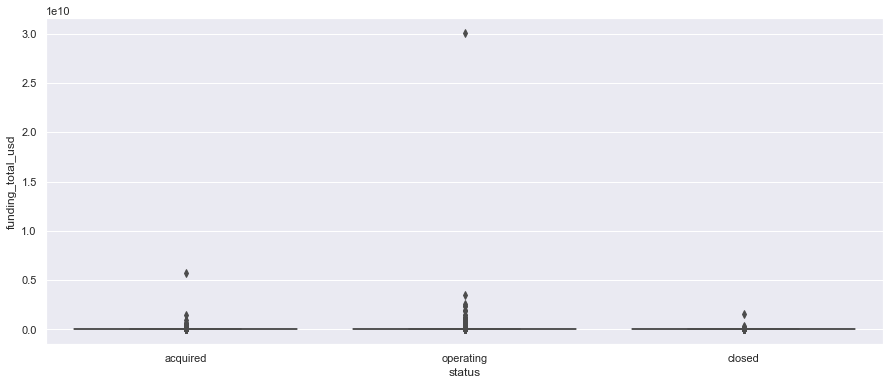

In [129]:
sns.boxplot(x="status", y="funding_total_usd", data=df2)

In [130]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2["status"]= encoder.fit_transform(df2["status"].astype(str))
df2.head()

,status,founded_year,funding_total_usd
0,0,2012.00,1750000.00
4,2,2014.00,60000.00
13,2,1984.00,1750000.00
16,2,2001.00,2050000.00
17,2,2008.00,40000.00


In [131]:
xt=df2[["founded_year","funding_total_usd"]]

In [132]:
yt=df2["status"]

In [133]:
x_train, x_test, y_train, y_test = train_test_split(xt, yt, test_size = 0.5)

In [134]:
from sklearn import preprocessing
from sklearn import utils
clf = tree.DecisionTreeClassifier(criterion="entropy")

print(utils.multiclass.type_of_target(y_train))

'''lab_enc = preprocessing.LabelEncoder()
xtrain = lab_enc.fit_transform(X_train)
print(ytrain)
print(utils.multiclass.type_of_target(X_train))
print(utils.multiclass.type_of_target(X_train.astype('int')))
print(utils.multiclass.type_of_target(xtrain))'''

multiclass


"lab_enc = preprocessing.LabelEncoder()\nxtrain = lab_enc.fit_transform(X_train)\nprint(ytrain)\nprint(utils.multiclass.type_of_target(X_train))\nprint(utils.multiclass.type_of_target(X_train.astype('int')))\nprint(utils.multiclass.type_of_target(xtrain))"

In [135]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
y_pred=clf.predict(x_test)
y_pred

array([2, 2, 0, ..., 2, 2, 2])

In [137]:
tree.plot_tree(clf)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [138]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
#graph.render("clf")

In [139]:
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  

In [140]:
graph = graphviz.Source(dot_data)  

In [141]:
graph

'C:\Users\honey' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tsvg']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\honey' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]

In [142]:

dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>0</SUB> &le; 2010.5<br/>entropy = 0.771<br/>samples = 9978<br/>value = [1049, 519, 8410]>, fillcolor="#8139e5d2"] ;\n1 [label=<X<SUB>1</SUB> &le; 2208999.0<br/>entropy = 0.922<br/>samples = 6696<br/>value = [947, 439, 5310]>, fillcolor="#8139e5c2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>1</SUB> &le; 531250.0<br/>entropy = 0.819<br/>samples = 2268<br/>value = [144, 241, 1883]>, fillcolor="#8139e5cf"] ;\n1 -> 2 ;\n3 [label=<X<SUB>0</SUB> &le; 2005.5<br/>entropy = 0.797<br/>samples = 1145<br/>value = [46, 151, 948]>, fillcolor="#8139e5cc"] ;\n2 -> 3 ;\n4 [label=<X<SUB>1</SUB> &le; 71733.5<br/>entropy = 0.462<br/>samples = 278<br/>value = [10, 11, 257]>, fillcolor="#8139e5eb"] ;\n3 -> 4 ;\n5 [label=<entropy = 0.0<br/>samples = 46<br/>value = [0, 0, 46]>, fillcolor="#8139e5ff"] ;\n4 -> 5 ;\n6 [label=<X<SUB>0<

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
#create an instance and fit the model 
logreg = LogisticRegression()
logreg.fit(x_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [146]:
y_predicted=logreg.predict(x_test)
y_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [147]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1076
           1       0.00      0.00      0.00       511
           2       0.84      1.00      0.91      8392

   micro avg       0.84      0.84      0.84      9979
   macro avg       0.28      0.33      0.30      9979
weighted avg       0.71      0.84      0.77      9979



In [148]:
print(confusion_matrix(y_test, y_predicted))

[[   0    0 1076]
 [   0    0  511]
 [   0    0 8392]]


In [149]:
print(accuracy_score(y_test, y_predicted))

0.8409660286601864


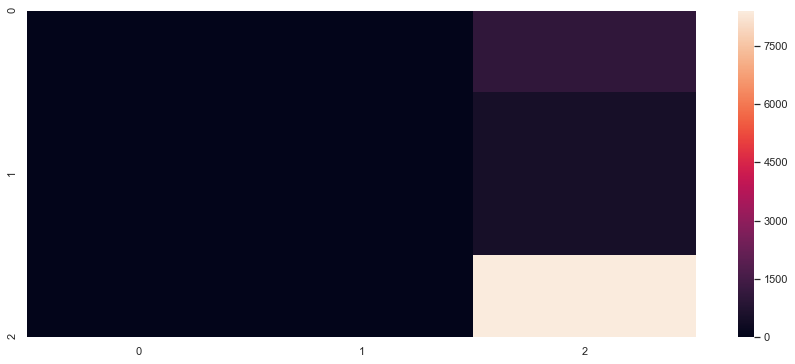

In [150]:
sns.heatmap(confusion_matrix(y_test, y_predicted))

In [151]:
round = data[['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']]
amount = [data['round_A'][data['round_A'] != 0].mean(),
          data['round_B'][data['round_B'] != 0].mean(),
          data['round_C'][data['round_C'] != 0].mean(),
          data['round_D'][data['round_D'] != 0].mean(),
          data['round_E'][data['round_E'] != 0].mean(),
          data['round_F'][data['round_F'] != 0].mean(),
          data['round_G'][data['round_G'] != 0].mean(),
         data['round_H'][data['round_H'] != 0].mean()]

In [152]:
x=df2["status"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,round, test_size = 0.6)

In [153]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [154]:
tree.plot_tree(clf)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [155]:
y_pred=clf.predict(x_test)

In [156]:
from sklearn import metrics
#metrics.accuracy_score(y_test,y_pred)

In [157]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)

In [158]:
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  

In [159]:
graph = graphviz.Source(dot_data) 
graph

'C:\Users\honey' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tsvg']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\honey' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]

In [160]:
db=data[['venture','seed','angel']]

In [161]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(db)
distances, indices = nbrs.kneighbors()

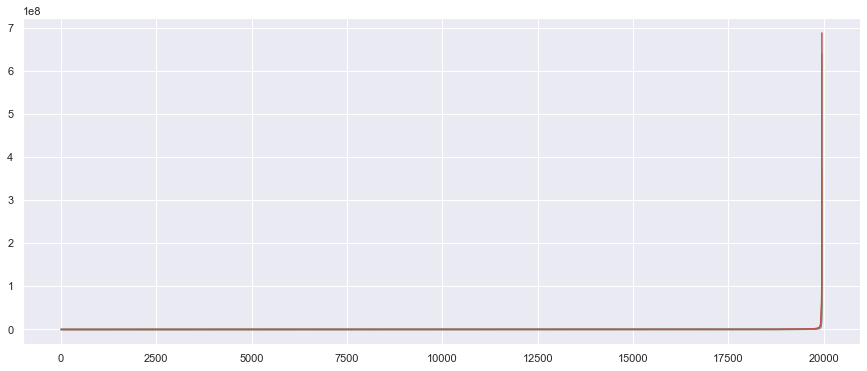

In [162]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)

In [163]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.8, min_samples=5).fit(db)

In [164]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [165]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 421
Estimated number of noise points: 8534


In [166]:
xx=data[["seed","grant"]]
outlier_detection = DBSCAN(min_samples =3.0, eps = 30)
clusters = outlier_detection.fit_predict(xx)
list(clusters).count(-1)

1344

In [167]:
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(xx)
preds

array([-1,  1,  1, ...,  1, -1,  1])

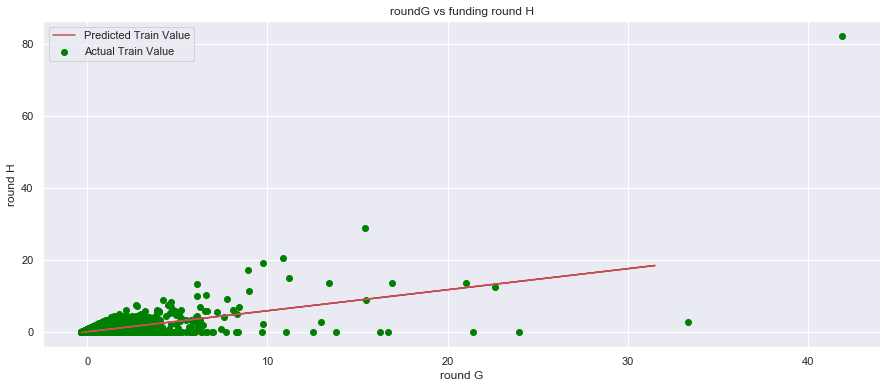

In [168]:
linearRegressor = LinearRegression()

y=data["round_G"].values.reshape(-1,1)
x=data["round_H"].values.reshape(-1,1)

#x_scaled = preprocessing.scale(x)
#y_scaled = preprocessing.scale(y)

xTrain, xTest, yTrain, yTest = train_test_split(x_scaled, y_scaled, test_size = 0.2, random_state = 0)
linearRegressor.fit(xTrain,yTrain)

y_pred = linearRegressor.predict(xTest)
linearRegressor.score(xTest,y_pred)
plt.scatter(xTrain, yTrain, color = 'green', marker='o', label='Actual Train Value')
plt.plot(xTest, y_pred, color = 'r', label='Predicted Train Value')
plt.title('roundG vs funding round H')
plt.legend()
plt.xlabel('round G')
plt.ylabel('round H')
plt.show()

In [169]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))

Mean Absolute Error: 0.21184139886607234
Mean Squared Error: 0.8389860711411234
Root Mean Squared Error: 0.9159618284301608


In [170]:
data1["market"].dtype

dtype('O')

In [171]:
cc=x = str(data1["market"])

In [172]:
data1["market"]=data1['market'].astype('category')

In [173]:
data1['market_Cat'] = data1['market'].cat.codes
data

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,first_funded_year,first_funded_month
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,New York,1,...,0,0,0,0,0,0,0,0,2012.00,June
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,Fort Worth,2,...,0,0,0,0,0,0,0,0,2014.00,August
13,1-800-DOCTORS,|Health and Wellness|,HealthandWellness,1750000.00,operating,USA,NJ,Newark,Iselin,1,...,0,0,0,0,0,0,0,0,2011.00,February
16,10-20 Media,|E-Commerce|,ECommerce,2050000.00,operating,USA,MD,Baltimore,Woodbine,4,...,0,0,0,0,0,0,0,0,2009.00,June
17,1000 Corks,|Search|,Search,40000.00,operating,USA,OR,"Portland, Oregon",Lake Oswego,1,...,0,0,0,0,0,0,0,0,2011.00,August
20,1000memories,|Curated Web|,CuratedWeb,2535000.00,acquired,USA,CA,SF Bay Area,San Francisco,2,...,0,0,0,0,0,0,0,0,2010.00,January
21,1000museums.com,|Curated Web|,CuratedWeb,4962651.00,operating,USA,WA,Seattle,Bellevue,6,...,0,0,0,0,0,0,0,0,2009.00,October
26,100health,|Health Care Information Technology|,HealthCareInformationTechnology,420000.00,operating,USA,WI,Madison,Madison,1,...,0,0,0,0,0,0,0,0,2014.00,November
27,100Plus,|Analytics|,Analytics,1250000.00,acquired,USA,CA,SF Bay Area,San Francisco,2,...,0,0,0,0,0,0,0,0,2011.00,February
28,1010data,|Software|,Software,35000000.00,operating,USA,NY,New York City,New York,1,...,0,0,0,0,0,0,0,0,2010.00,August


In [174]:
data1['city']=str(data1['city'])

In [176]:
data1['city']= encoder.fit_transform(data1['city'])
data1

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,count,market_Cat
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,0,...,0,0,0,0,0,0,0,0,1,465
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.00,operating,USA,CA,Los Angeles,0,...,0,0,0,0,0,0,0,0,1,277
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.00,operating,EST,NaN,Tallinn,0,...,0,0,0,0,0,0,0,0,1,543
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.00,operating,GBR,NaN,London,0,...,0,0,0,0,0,0,0,0,1,211
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,0,...,0,0,0,0,0,0,0,0,1,683
5,.Club Domains,http://nic.club/,|Software|,Software,7000000.00,NaN,USA,FL,Ft. Lauderdale,0,...,0,7000000,0,0,0,0,0,0,1,636
6,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,4912393.00,closed,ARG,NaN,Buenos Aires,0,...,0,0,0,0,0,0,0,0,1,7
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000.00,operating,NaN,NaN,NaN,0,...,2000000,0,0,0,0,0,0,0,1,153
8,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,nan,operating,USA,IL,"Springfield, Illinois",0,...,0,0,0,0,0,0,0,0,1,636
9,01Games Technology,http://www.01games.hk/,|Games|,Games,41250.00,operating,HKG,NaN,Hong Kong,0,...,0,0,0,0,0,0,0,0,1,277


In [177]:
M=data1["market_Cat"].values.reshape(-1,1)

In [178]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(M)
distances, indices = nbrs.kneighbors(M)

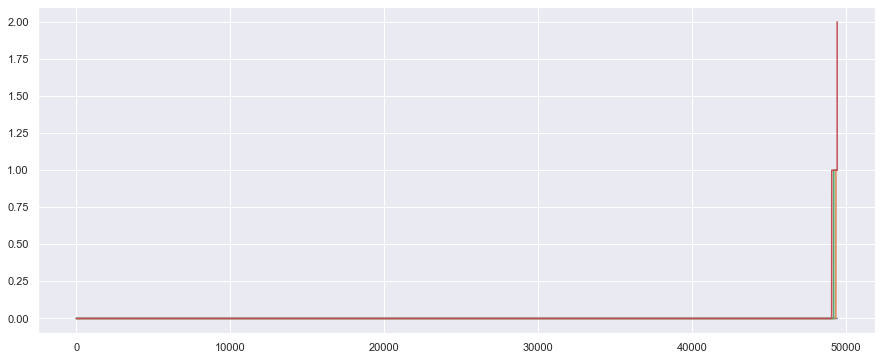

In [179]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)

In [180]:
clustering = DBSCAN(eps=1.5, min_samples=5).fit(M)

In [181]:
clustering.labels_

array([0, 1, 0, ..., 3, 1, 2], dtype=int64)

In [182]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [183]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 0


In [186]:
print("Frequency count of missing values:", data1["market_Cat"].count())

Frequency count of missing values: 49438


In [187]:
M=data1["market_Cat"].values.reshape(-1,1)

In [188]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(M)
MS= imp_mean.transform(M)

In [189]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(MS)
distances, indices = nbrs.kneighbors(MS)

In [190]:
clustering = DBSCAN(eps=1.5, min_samples=5).fit(MS)

In [191]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [192]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 0


In [193]:
data1["country_code"]=data1['country_code'].astype('category')

In [194]:
data1['ccountry_code_cat'] = data1['country_code'].cat.codes
data1

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,count,market_Cat,ccountry_code_cat
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.00,acquired,USA,NY,New York City,0,...,0,0,0,0,0,0,0,1,465,110
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.00,operating,USA,CA,Los Angeles,0,...,0,0,0,0,0,0,0,1,277,110
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.00,operating,EST,NaN,Tallinn,0,...,0,0,0,0,0,0,0,1,543,35
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.00,operating,GBR,NaN,London,0,...,0,0,0,0,0,0,0,1,211,38
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.00,operating,USA,TX,Dallas,0,...,0,0,0,0,0,0,0,1,683,110
5,.Club Domains,http://nic.club/,|Software|,Software,7000000.00,NaN,USA,FL,Ft. Lauderdale,0,...,7000000,0,0,0,0,0,0,1,636,110
6,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,4912393.00,closed,ARG,NaN,Buenos Aires,0,...,0,0,0,0,0,0,0,1,7,2
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000.00,operating,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,153,-1
8,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,nan,operating,USA,IL,"Springfield, Illinois",0,...,0,0,0,0,0,0,0,1,636,110
9,01Games Technology,http://www.01games.hk/,|Games|,Games,41250.00,operating,HKG,NaN,Hong Kong,0,...,0,0,0,0,0,0,0,1,277,43


In [195]:
data1['ccountry_code_cat'].head(50)

0     110
1     110
2      35
3      38
4     110
5     110
6       2
7      -1
8     110
9      43
10     19
11    110
12    110
13    110
14    110
15     38
16    110
17    110
18     -1
19     28
20    110
21    110
22     37
23     20
24     -1
25     20
26    110
27    110
28    110
29     17
30    110
31     -1
32      4
33    110
34    110
35    110
36     -1
37     20
38    110
39     -1
40     -1
41    110
42    110
43      4
44    110
45     -1
46     90
47     38
48     37
49     79
Name: ccountry_code_cat, dtype: int8

In [196]:
CCC=data1["ccountry_code_cat"].values.reshape(-1,1)

In [197]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(CCC)
CS= imp_mean.transform(CCC)

In [198]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(CS)
distances, indices = nbrs.kneighbors(CS)

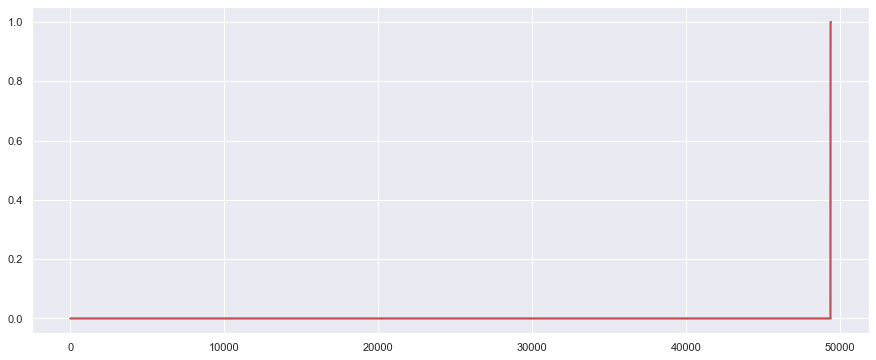

In [199]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)

In [200]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(CS)

In [201]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [202]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 77
Estimated number of noise points: 76


In [203]:
cm=data1[["ccountry_code_cat","market_Cat"]].values.reshape(-1,1)

In [204]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(cm)
distances, indices = nbrs.kneighbors(cm)

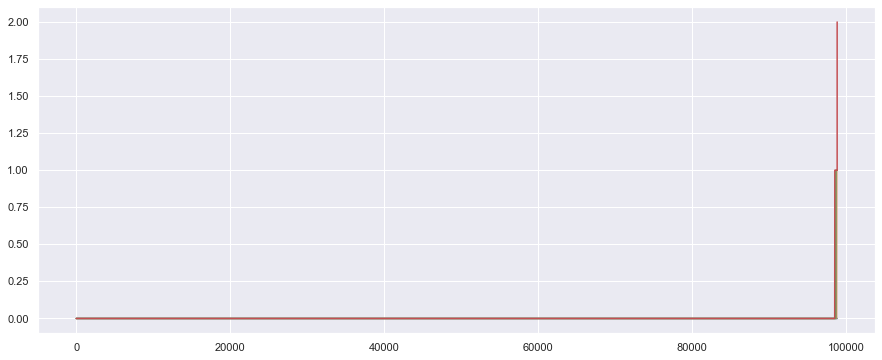

In [205]:
distances = np.sort(distances, axis=0)
#distances = distances[:,1]
plt.plot(distances)

In [206]:
clustering = DBSCAN(eps=1.2, min_samples=5).fit(cm)

In [207]:
labels = clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [208]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 0


In [209]:
c=data1[["ccountry_code_cat"]].values.reshape(-1,1)
m=data1[["market_Cat"]].values.reshape(-1,1)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(c,m, test_size = 0.5)

In [211]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)

tree.plot_tree(clf)
y_pred=clf.predict(X_test)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [212]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

'C:\Users\honey' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tsvg']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\honey' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]

In [213]:
y_pred=clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.11570047332011812

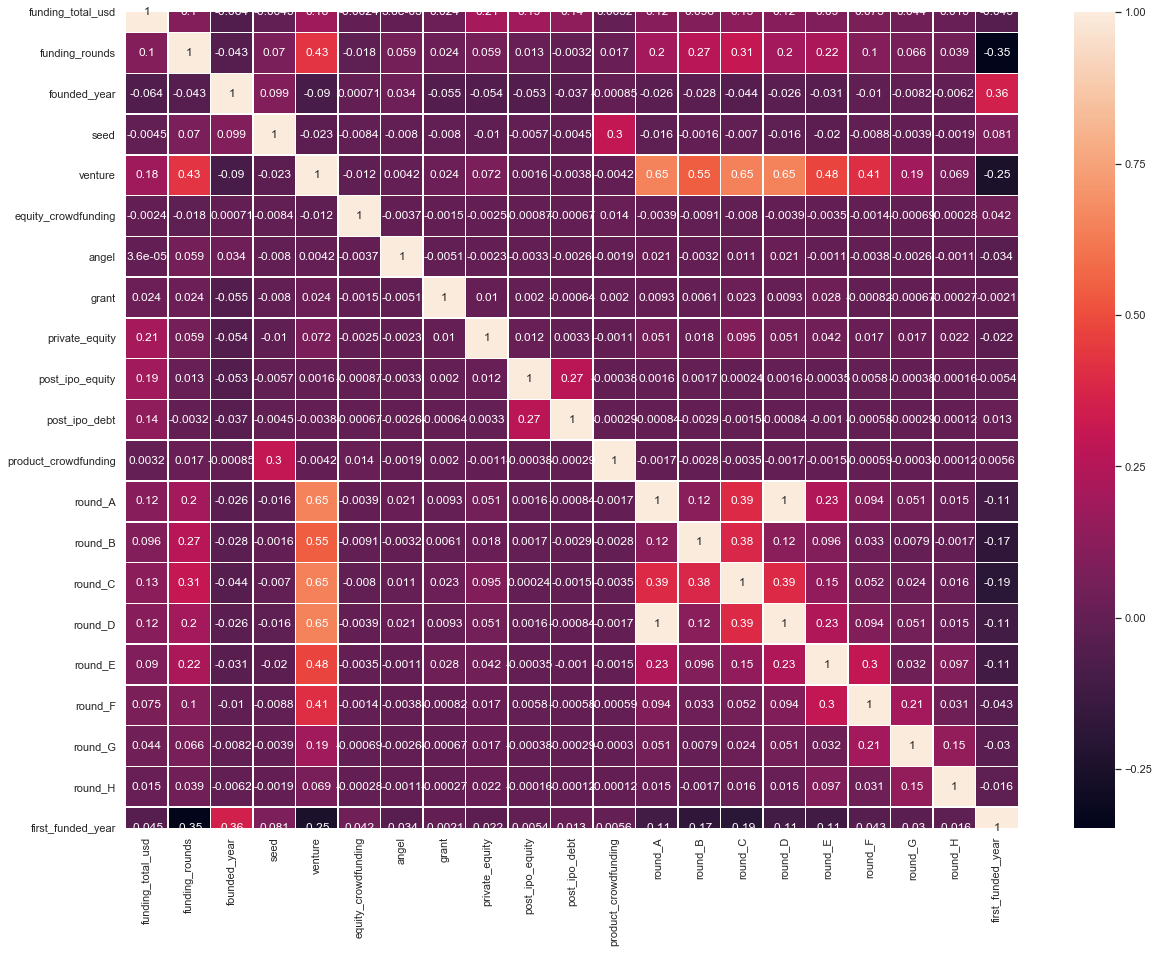

In [214]:
plt.subplots(figsize=(20,15))

sns.heatmap(data.corr(), annot=True, linewidth=0.5);

In [215]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [216]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)

In [217]:
model.score(X_test, y_test)

0.11650956753913994

In [226]:
m=data1["market_Cat"].values.reshape(-1,1)
data1["status"]= encoder.fit_transform(data1["status"].astype(str))
s=data1[["status"]].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(m,s, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)


predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1223
           1       0.00      0.00      0.00       870
           2       0.00      0.00      0.00       433
           3       0.85      1.00      0.92     13789

   micro avg       0.85      0.85      0.85     16315
   macro avg       0.21      0.25      0.23     16315
weighted avg       0.71      0.85      0.77     16315

[[    0     0     0  1223]
 [    0     0     0   870]
 [    0     0     0   433]
 [    0     0     0 13789]]
0.8451731535396874
